In [1]:
# Lead Scoring Case Study

In [2]:
## Problem Statement

#### To support X Education in determining the lead score against each of the leads and then identify good leads so that the company can use their resources on the probable leads in order to make the process efficient and also imporve their conversion rate against time

#Approach:

#Step 1- Reading and inspecting the data

#Step 2- Data Cleaning - Missing Value Treatment, others

#Step 3- EDA: Univariate Analysis, Outlier treatment

#Step 4- EDA: Bivariate Analysis

#Step 5- Data Preparation : Dummy Variable Creation

#Step 6- Test-Train Split

#Step 7- Feature Scaling

#Step 8- Looking at Correlations

#Step 9- Model Building

#Step 10- Plotting the ROC curve

#Step 11- Finding Optimal Cut off point

#Step 12- Making predictions on the test set

#Step 13- Finding Leading Score

In [3]:
### Step 1: Reading and inspecting the data

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#Setting the theme of the graphs
sns.set(color_codes=True)

# Set Option for displaying max columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Importing all datasets
leads_data = pd.read_csv("Downloads/Data science/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [7]:
leads_data.shape

(9240, 37)

In [8]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
#On checking the stats of numerical columns we can see possibilities of outliers in some columns like Total Time Spent on Website*

In [11]:
round((leads_data.isnull().sum()/len(leads_data)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [12]:
leads_data['Lead Number'].nunique()

9240

In [13]:
leads_data['Prospect ID'].nunique()

9240

In [14]:
#We can see that there are 9240 unique Lead Number and Prospect ID which is equal to the number of rows present thus no repeated lead entry

In [15]:
#**Insights and Actions :**
#1. On looking at the data dictionary we figured that columns 'Lead Profile', 'Tags', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score',Asymmetrique Activity Score' are assigned after checking the leads.Hence we should not consider them while determining the lead score, so we will drop these columns.

#2. Datatype of all the variables are fine except TotalVisits(which should be int but currently is float).

#3. In Some columns Leads have not selected any option. Hence it is showing as 'Select' in dataframe. We need to replace it with missing value.

In [16]:
## Step 2- Data Cleaning : Missing Value Treatment, others

In [17]:
# Dropping the column 'Lead Profile','Tags', 'Asymmetrique Activity Index','Asymmetrique Profile Index' and 'Asymmetrique Profile Score'
leads_data.drop(['Lead Profile','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score'], axis=1, inplace=True)


In [18]:
# Replacing 'Select' in dataframe with missing value
leads_data.replace(to_replace='Select',value = np.NAN,inplace=True)

In [19]:
#Checking for null values % again (in descending order)
(leads_data.isnull().sum()/len(leads_data)).sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Quality                                     0.515909
City                                             0.397078
Specialization                                   0.365801
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Update me on Supply Chain Content                0.000000
Newspaper                                        0.000000
Get updates on DM Content                        0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
Receive More Updates About Our Courses           0.000000
Through Recomm

In [20]:
####  Insight and Action:

#### Columns in which missing value is greater than 50%
#- How did you hear about X Education - 78.46%
#- Lead Quality - 51.59%

#### Columns in which missing value is between 30%-50%
#- City - 39.7%
#- Specialization - 36.58%

#### Columns in which missing value is between 10%-30%
#- What matters most to you in choosing a course - 29.31%
#- What is your current occupation - 29.11%
#- Country - 26.63%

#### Columns in which missing value is between 1%-10%
#- TotalVisits - 1.48%
#- Page Views Per Visit - 1.48%
#- Last Activity - 1.11%

#### Columns in which missing value is less than 1%
#- Lead Source - 0.38%

In [21]:
### Dropping columns having missing value percentage greater than 50% (as too many rows are missing for these columns, hence will not be useful in our analysis) : How did you hear about X Education & Lead Quality

In [22]:
#Columns with missing values less than 50%
len(leads_data.columns[leads_data.isnull().sum() < len(leads_data)/2])

29

In [23]:
#Removing columns with missing values more than 50%
Leads=leads_data[leads_data.columns[leads_data.isnull().sum() < len(leads_data)/2]]

In [24]:
#Checking the shape again
Leads.shape

(9240, 29)

In [25]:
### Missing value treatment for columns with missing value between 30% to 50% : City & Specialization

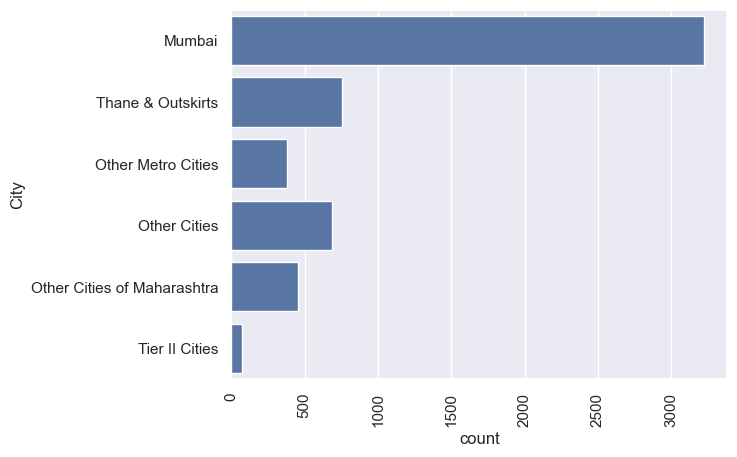

In [26]:
#Plotting City
sns.countplot(Leads['City'])
plt.xticks(rotation=90)
plt.show()

In [27]:
#As we can notice from the above bar graph that majority of the learners are from Mumbai, around 58%; thus we have decided to impute 'Mumbai' which is the mode of this column for the missing values

In [28]:
# Imputing the value of 'City' with the mode
Leads['City'].fillna(Leads['City'].mode()[0],inplace=True)

In [29]:
Leads.City.isnull().sum()

0

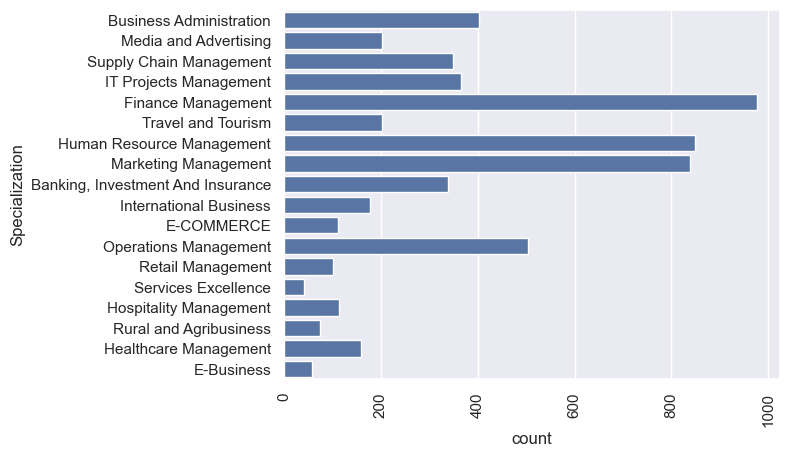

In [30]:
#Plotting Specialization
sns.countplot(Leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [31]:
#Value counts understanding
Leads['Specialization'].value_counts(normalize=True)

Specialization
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: proportion, dtype: float64

In [32]:
#We can see that there is not one clear majority for a specialization, also there can be possibilities of specializations other than the list provided to which the learner could belong to or they do not want to disclose. Thus, we will replace all the missing values in this column with 'Others/Not Disclosed'

In [33]:
Leads['Specialization'].fillna('Others/Not Disclosed',inplace=True)

In [34]:
Leads['Specialization'].isnull().sum()

0

In [35]:
### Missing value treatment for columns with missing value between 10% to 30% - 
#Choosing a course, What is your current occupation & Country

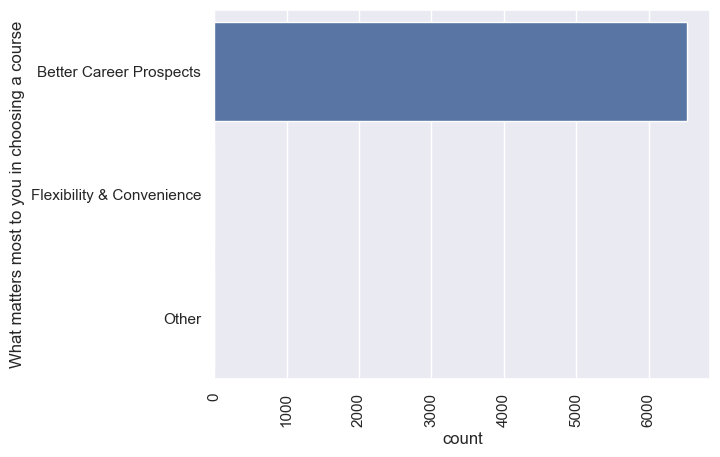

In [36]:
#Plotting 'What matters most to you in choosing a course'
sns.countplot(Leads['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [37]:
# Imputing the value of 'What matters most to you in choosing a course' with the mode
Leads['What matters most to you in choosing a course'].fillna(Leads['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [38]:
Leads['What matters most to you in choosing a course'].isnull().sum()

0

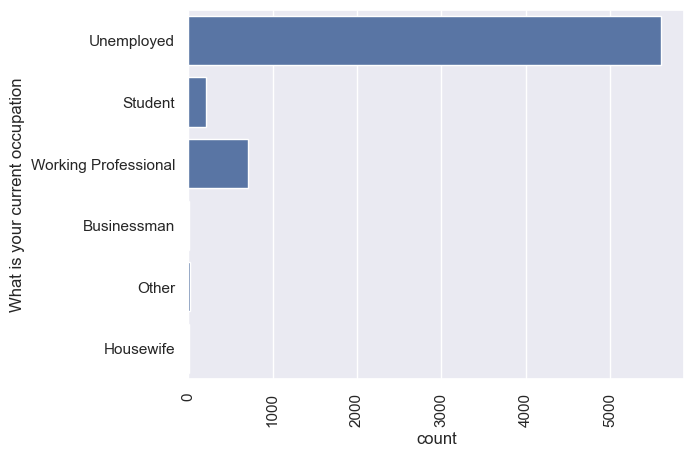

In [39]:
#Plotting What is your current occupation
sns.countplot(Leads['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [40]:
# Imputing the value of 'What is your current occupation' with the mode 
Leads['What is your current occupation'].fillna(Leads['What is your current occupation'].mode()[0],inplace=True)

In [41]:
Leads['What is your current occupation'].isnull().sum()

0

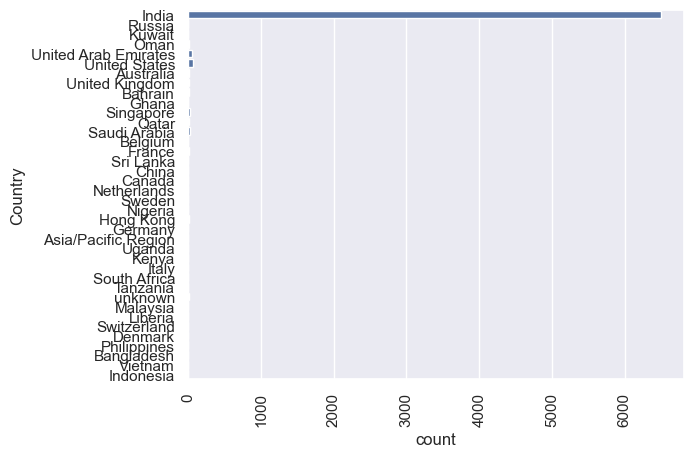

In [42]:
#Plotting Country
sns.countplot(Leads['Country'])
plt.xticks(rotation=90)
plt.show()

In [43]:
# Imputing the value of 'Country' with the mode
Leads['Country'].fillna(Leads['Country'].mode()[0],inplace=True)

In [44]:
Leads['Country'].isnull().sum()

0

In [45]:
### Missing value treatment for columns with missing value between 1% to 10% - TotalVisits, Page Views Per Visit & Last Activity

In [46]:
#Checking the number missing values for the rows where TotalVisits has missing values 
Leads[np.isnan(Leads['TotalVisits'])].isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        7
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [47]:
# Dropping 137 rows in 'TotalVisits' 
Leads=Leads[~np.isnan(Leads['TotalVisits'])]

In [48]:
### Missing value treatment for columns with missing value less than 1%-  Lead Source

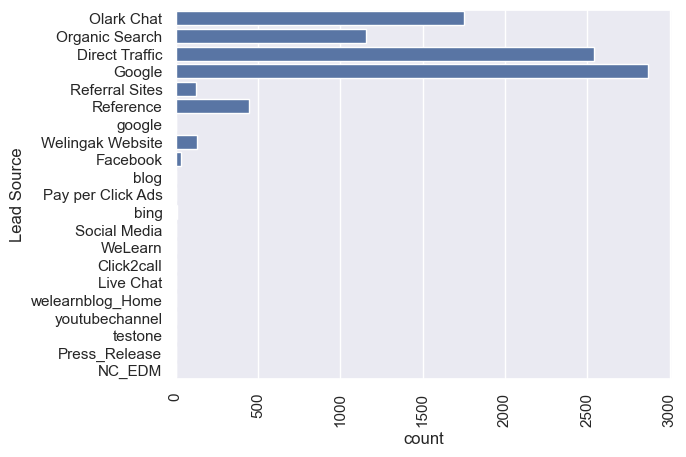

In [49]:
#Plotting 'Lead Source'
sns.countplot(Leads['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [50]:
#As the missing value is a very small percentage and no clear majority in this column thus removing the missing value rows
Leads.dropna(inplace = True)

In [51]:
#Re-Checking for null values % again (in descending order)
(Leads.isnull().sum()/len(Leads)).sort_values(ascending=False)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                       

In [52]:
# Checking the DataFrame
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Others/Not Disclosed                      Unemployed   
1   India     Others/Not Disclosed                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Others/Not Disclosed                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes    

In [53]:
# Cheking the data type of dataframe
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [54]:
# Changing the data type of TotalVisits from float to int
Leads['TotalVisits'] = Leads['TotalVisits'].astype(int)

In [55]:
## Step 3- EDA: Univariate Analysis, Outlier treatment

In [56]:
#Checking the imbalance on target variable
(Leads['Converted']==0).sum()/(Leads['Converted']==1).sum()

1.6416302765647743

In [57]:
### Univariate Analysis on categorical Column

In [58]:
# Creating a list of categorical column;Removing ProspectID as not required for the univariate analysis
cat_column = Leads.select_dtypes(include='object').drop('Prospect ID',axis=1).columns
cat_column

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
#### a. Lead Origin

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

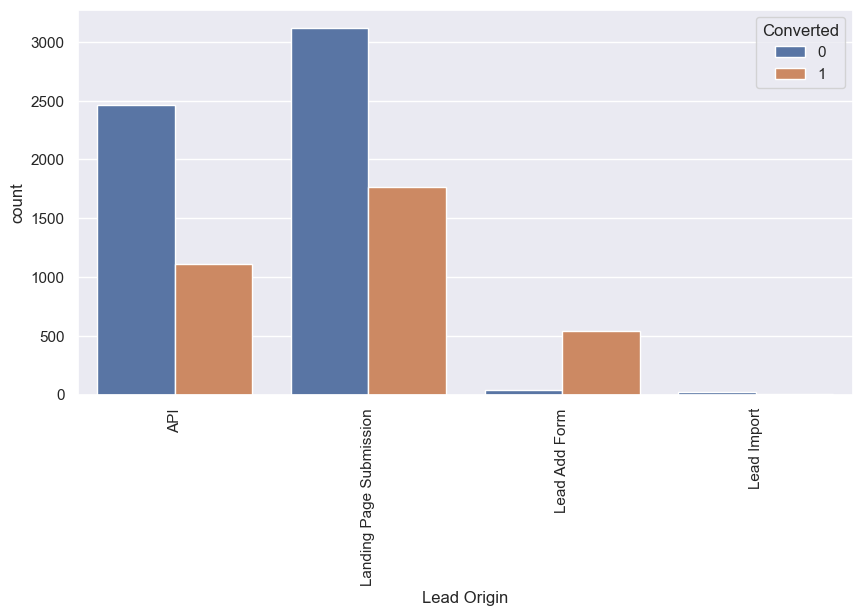

In [61]:
# Plotting Lead Origin
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Lead Origin',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [62]:
#1. Overall count of lead origin is maximum for 'Landing Page Submission' followed by 'API'; conversion percentage highest for lead origin from 'Lead Add Form'
#2. Column looks important for further modelling

In [63]:
#### b. Lead Source

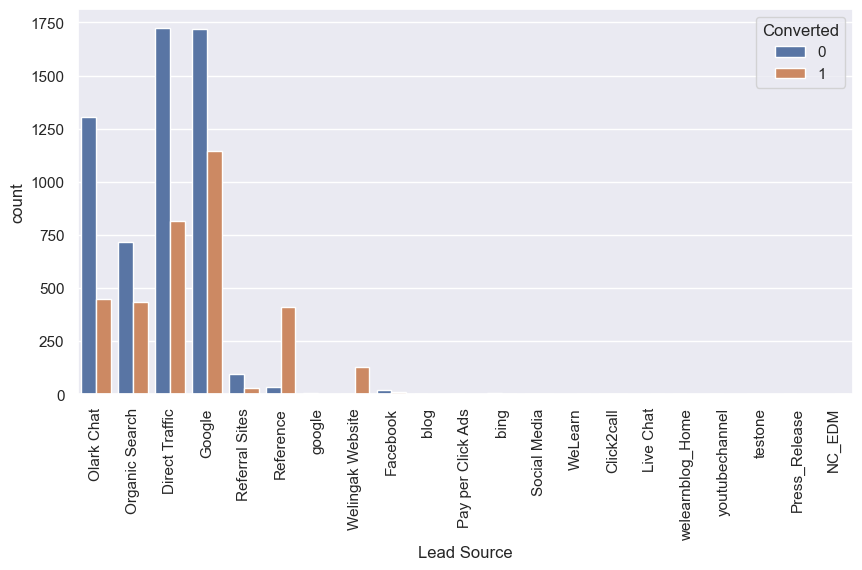

In [64]:
# Plotting Lead Source
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [65]:
#1. Most of the Leads are through Google,direct traffic, Olark chat and Organic Search
#2. Conversion rate is higher for 'Reference'and Welingak Website
#3. Options with very low count numbers will be clubbed in one as 'Others' : to convert all features other than 'Olark Chat' , 'Organic Search','Direct Traffic','Google','Reference','Welingak Website into new category as 'Others'
#4. 'google' to be replaced with 'Google'

In [66]:
Leads['Lead Source'].value_counts(normalize=True)

Lead Source
Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: proportion, dtype: float64

In [67]:
# Clubbing features and other action
Leads['Lead Source'].replace('google','Google',inplace=True)
Leads['Lead Source'].replace(['Referral Sites','Facebook','bing','blog','Pay per Click Ads','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'Others',inplace=True)

In [68]:
#### c. Do Not Email

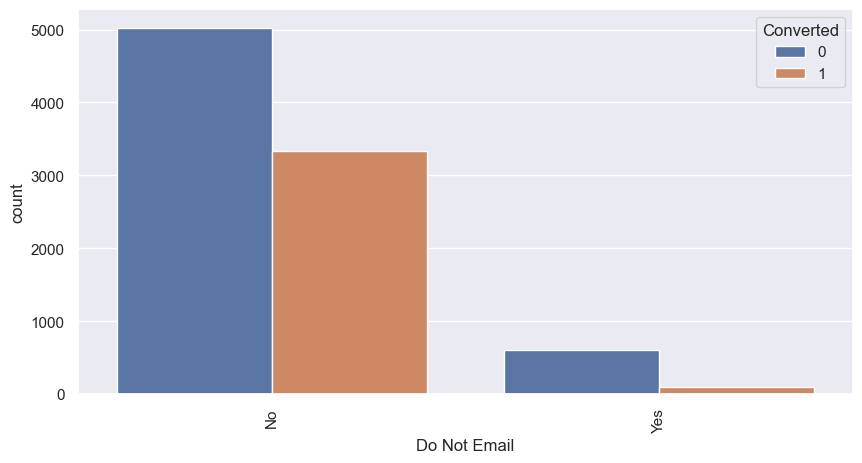

In [69]:
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Do Not Email',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [70]:
Leads['Do Not Email'].value_counts(normalize=True)

Do Not Email
No     0.921093
Yes    0.078907
Name: proportion, dtype: float64

In [71]:
##1. Most of the Leads has opted for 'No'. Approx 92 %.
##2. Column can be removed may not be useful from modelling point of view

In [72]:
# Dropping the Column
Leads.drop('Do Not Email',axis=1,inplace=True)

In [73]:
#### d. Do Not Call

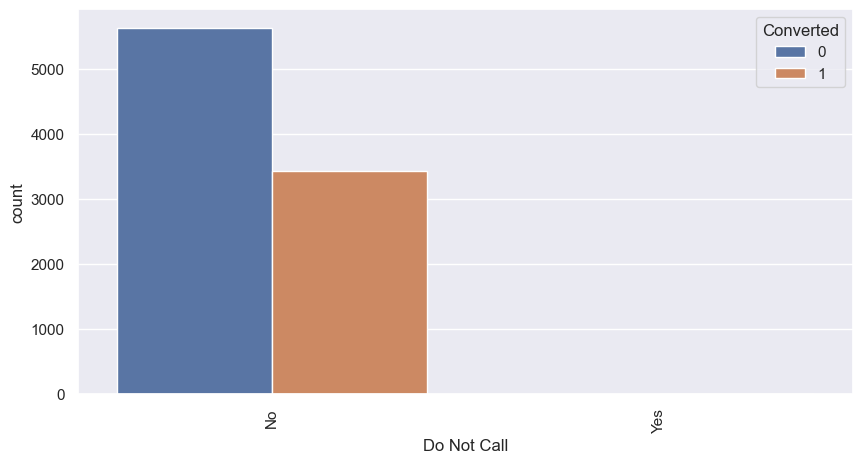

In [74]:
# Plotting the 'Do Not Call'
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Do Not Call',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [75]:
##1. Most of the Leads have opted for 'No'
##2. Column can be removed may not be useful from modelling point of view

In [76]:
Leads.drop('Do Not Call',axis=1,inplace=True)

In [77]:
#### e. Last Activity

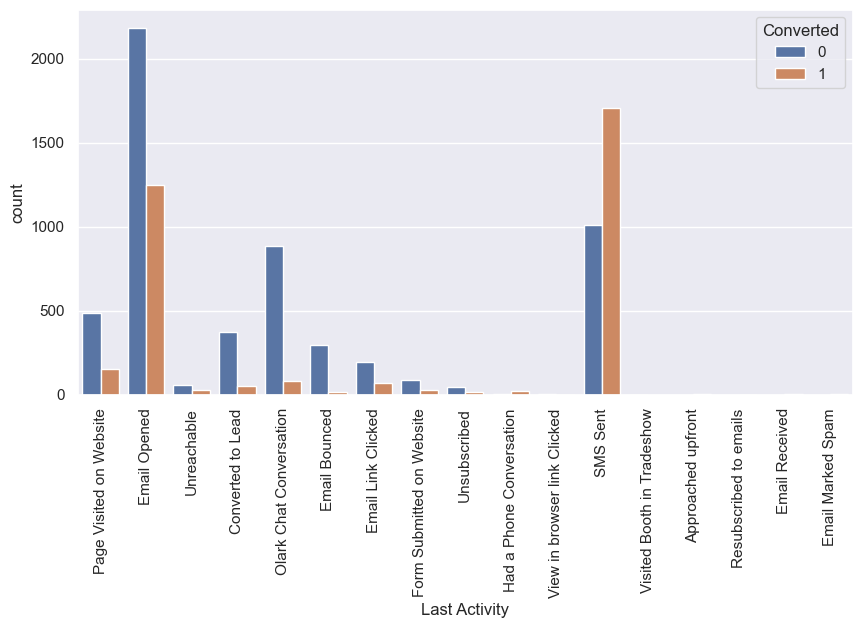

In [78]:
# Plotting the Last Activity
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [79]:
#1. Count wise we can notice that 'Email opened' have the responses but in terms of conversion rate 'SMS sent' as the last activity is the highest
#3. Features like 'Unreachable','Unsubscribed','Had a Phone Conversation', 'View in browser link Clicked','Approached upfront', 'Visited Booth in Tradeshow','Resubscribed to emails', 'Email Received', 'Email Marked Spam' can be converted into others

In [80]:
Leads['Last Activity'].value_counts(normalize=True)

Last Activity
Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: proportion, dtype: float64

In [81]:
# Clubbing Features
Leads['Last Activity'].replace(['Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Email Received','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Visited Booth in Tradeshow'],'Others',inplace=True)

In [82]:
#### f. Country

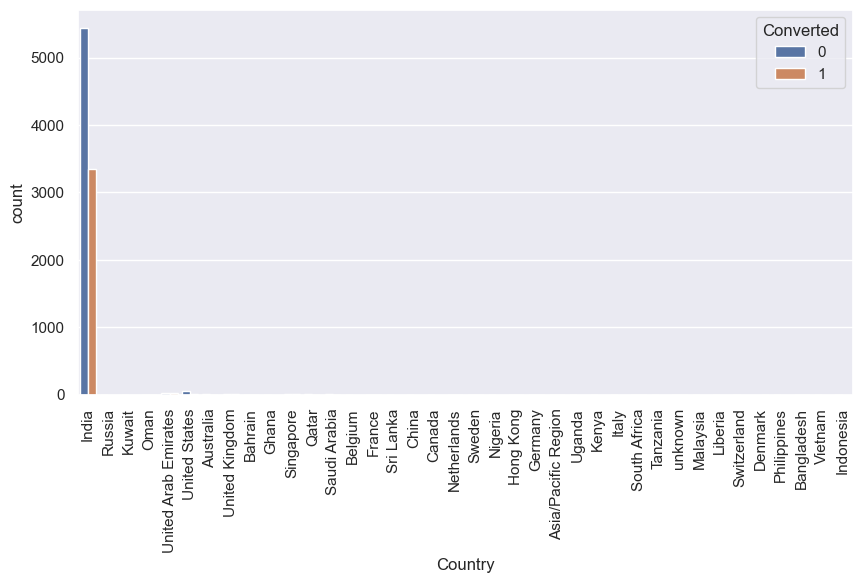

In [83]:
# Plotting Country
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Country',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [84]:
#1. Major Leads are from India only
#2. Column can be removed may not be useful from modelling point of view

In [85]:
# dropping the column
Leads.drop('Country',axis=1,inplace=True)

In [86]:
#### g. Specialization

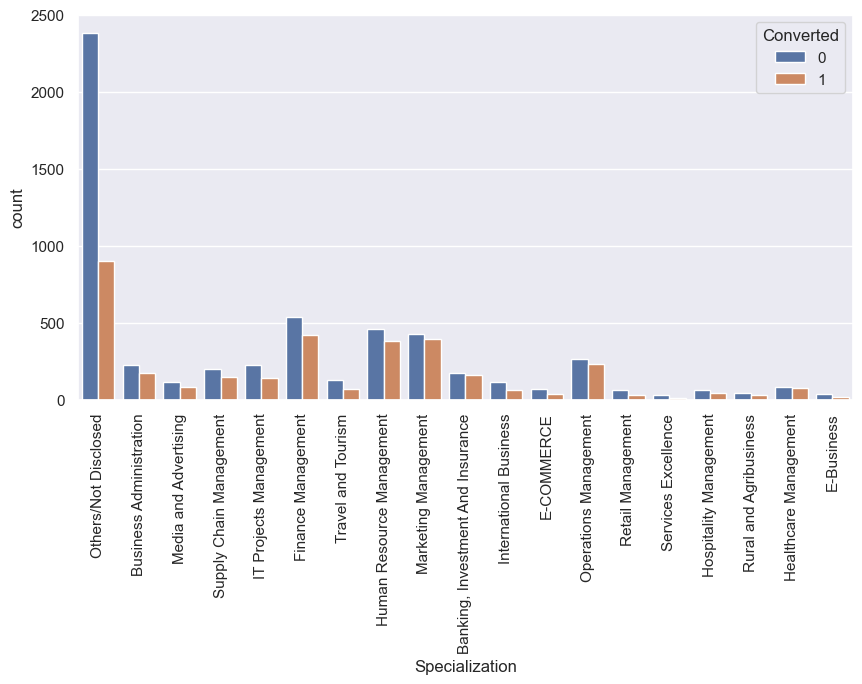

In [87]:
# Plotting the Specialization
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [88]:
#1. Maximum count for Others/Not disclosed. Good conversion rate for 'Finance Management', 'Marketing Management', 'Human Resource Management'
#2. Features like 'International Business', 'E-COMMERCE', 'Retail Management','Services Excellence', 'Hospitality Management','Rural and Agribusiness', 'Healthcare Management', 'E-Business' ca be converted into others

In [89]:
# Clubbing the features
Leads['Specialization'].replace(['International Business', 'E-COMMERCE', 'Retail Management','Services Excellence', 'Hospitality Management','Rural and Agribusiness', 'Healthcare Management', 'E-Business'],'Others',inplace=True)

In [90]:
#### h. What is your current occupation

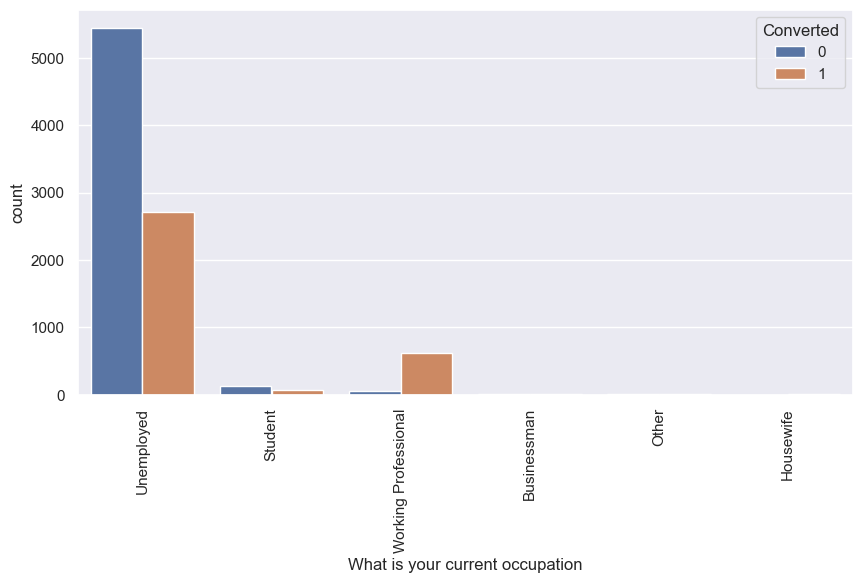

In [91]:
# Plotting the What is your current occupation
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [92]:
#1. Majority responses from unemployed leads, a very good conversion rate for 'Working Professional'
#2. Features likes 'Other','Housewife','Businessman' can be converted in to Other

In [93]:
Leads['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: proportion, dtype: float64

In [94]:
# Clubbing Features
Leads['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others',inplace=True)

In [95]:
#### i. What matters most to you in choosing a course

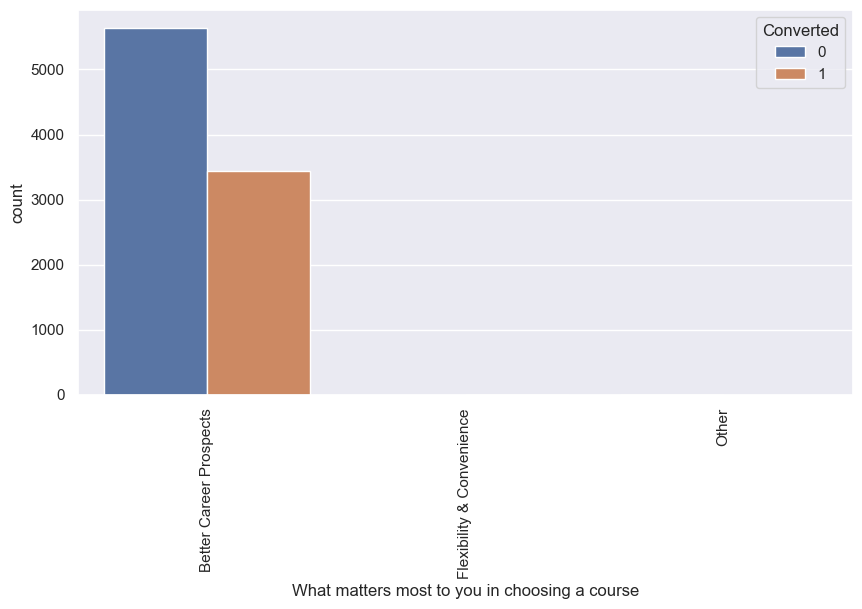

In [96]:
# Plotting What matters most to you in choosing a course
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='What matters most to you in choosing a course',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [97]:
#1. Most of the leads looking for Better career prospects
#2. Column can be removed may not be useful from modelling point of view

In [98]:
# Dropping the column
Leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [99]:
#### j. Search

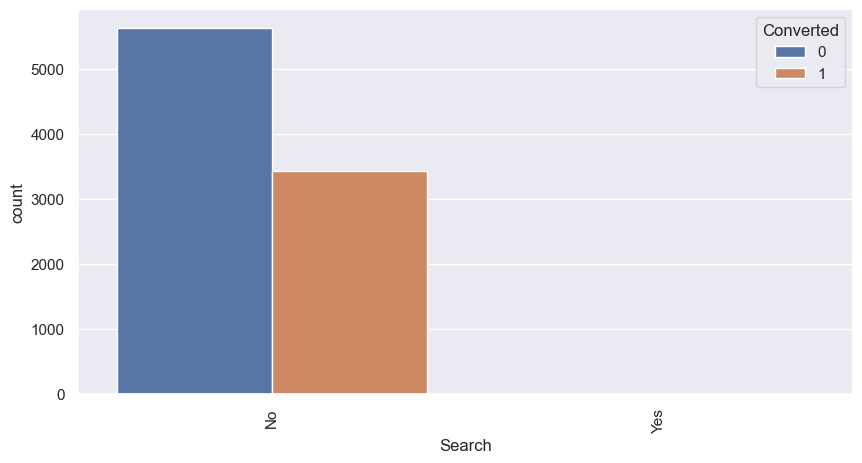

In [100]:
# Plotting the Search
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Search',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [101]:
#1. Most Leads filled No
#2. Column can be removed may not be useful from modelling point of view

In [102]:
# Dropping the Column
Leads.drop('Search',axis=1,inplace=True)

In [103]:
#### k. Magazine

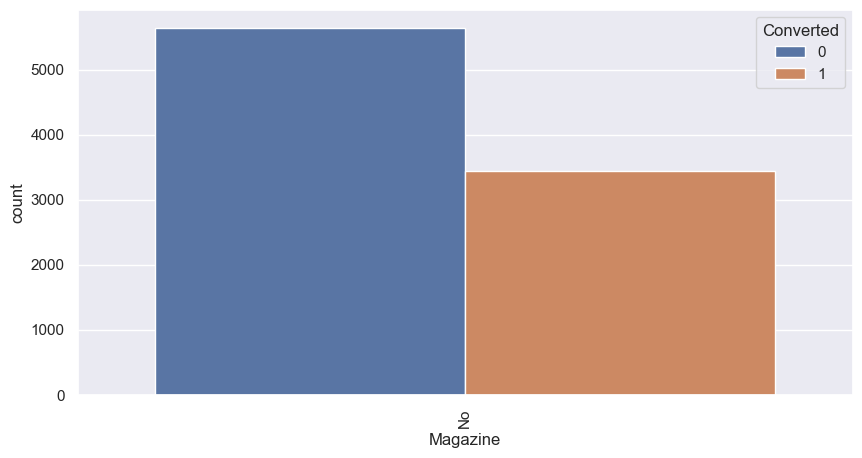

In [104]:
# Plotting Magzine
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Magazine',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [105]:
#1. All the leads filled No
#2. Column can be removed may not be useful from modelling point of view

In [106]:
# Dropping the Column
Leads.drop('Magazine',axis=1,inplace=True)

In [107]:
#### l. Newspaper Article

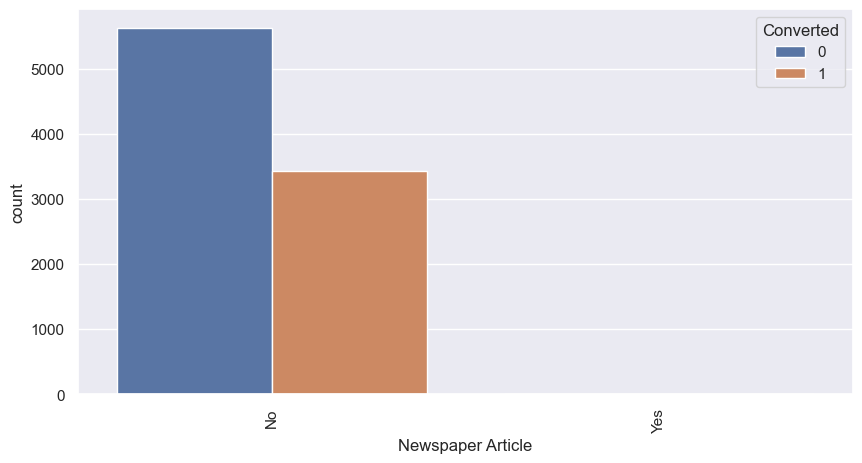

In [108]:
# Plotting Newspaper Article
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Newspaper Article',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [109]:
# Dropping the Column as its not imprtant for modelling
Leads.drop('Newspaper Article',axis=1,inplace=True)

In [110]:
#### m. X Education Forums

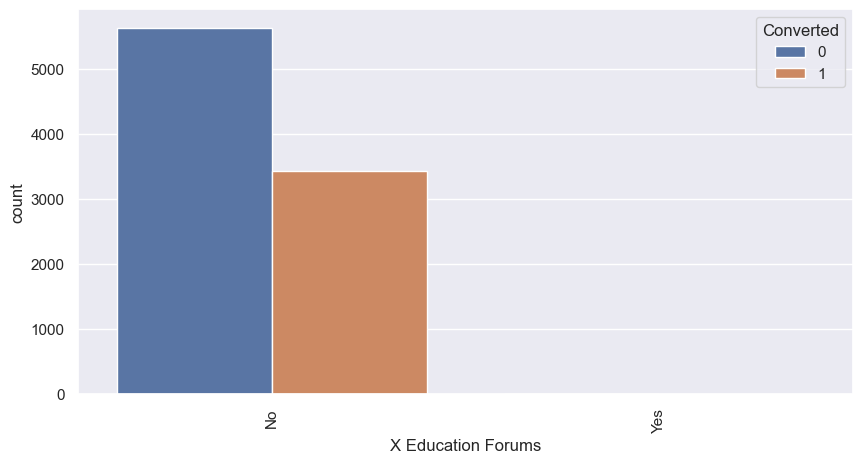

In [111]:
# Plotting X Education Forums
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='X Education Forums',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [112]:
# Dropping the Column
Leads.drop('X Education Forums',axis=1,inplace=True)

In [113]:
#### n. Newspaper

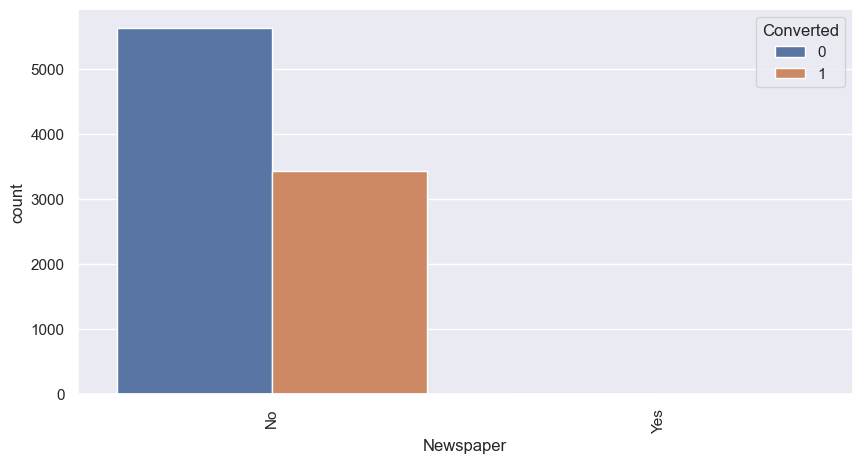

In [114]:
# Plotting Newspaper
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Newspaper',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [115]:
# Dropping the Column
Leads.drop('Newspaper',axis=1,inplace=True)

In [116]:
#### o. Digital Advertisement

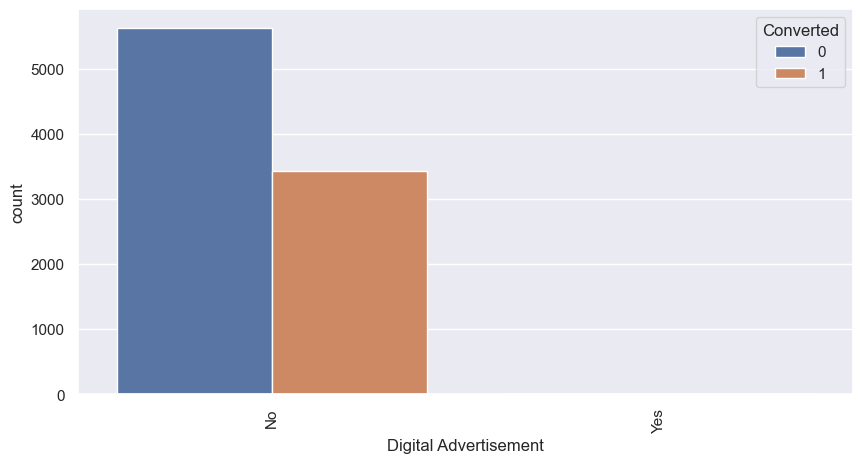

In [117]:
# Plotting Digital Advertisement
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Digital Advertisement',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [118]:
# Dropping the Column
Leads.drop('Digital Advertisement',axis=1,inplace=True)

In [119]:
#### p. Through Recommendations

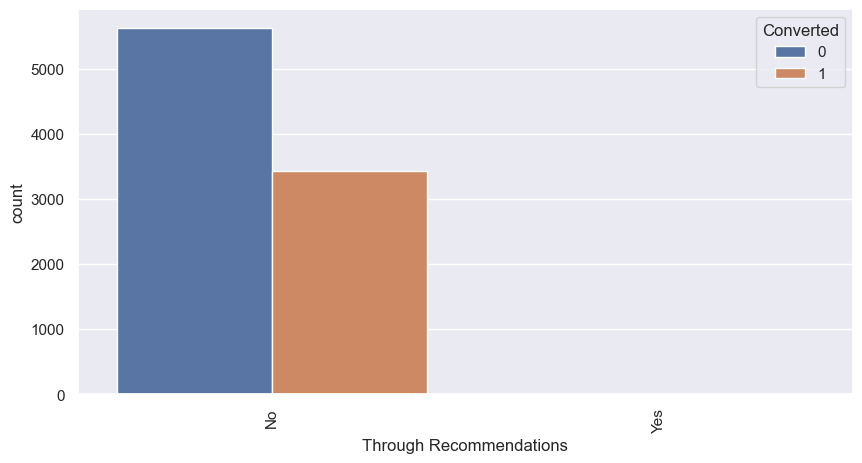

In [120]:
# Plotting Through Recommendation
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Through Recommendations',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [121]:
# Dropping the Column
Leads.drop('Through Recommendations',axis=1,inplace=True)

In [122]:
#### q. Receive More Updates About Our Courses

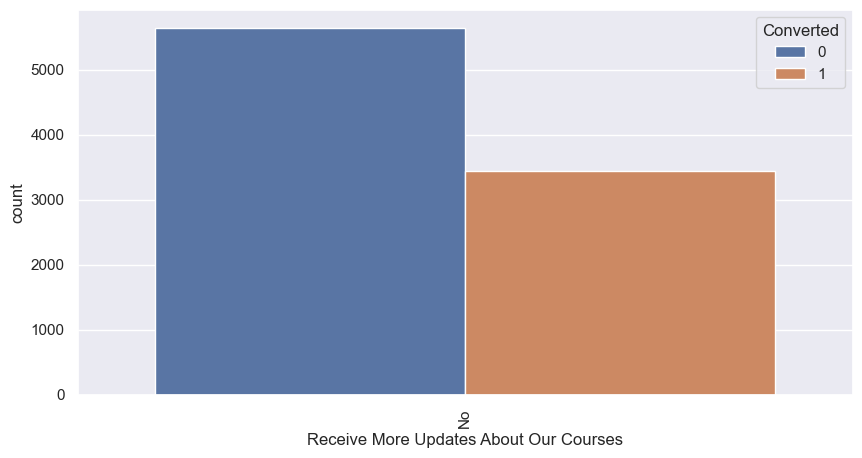

In [123]:
# Plotting Receive More Updates About Our Courses
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Receive More Updates About Our Courses',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [124]:
# Dropping the Column
Leads.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [125]:
#### r. Update me on Supply Chain Content

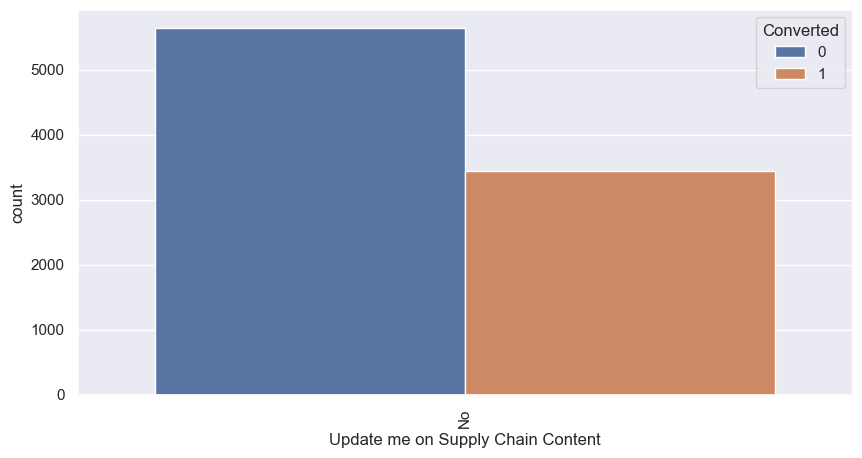

In [126]:
# Plotting Update me on Supply Chain Content
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Update me on Supply Chain Content',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [127]:
# Dropping the Column
Leads.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [128]:
#### s. Get updates on DM Content

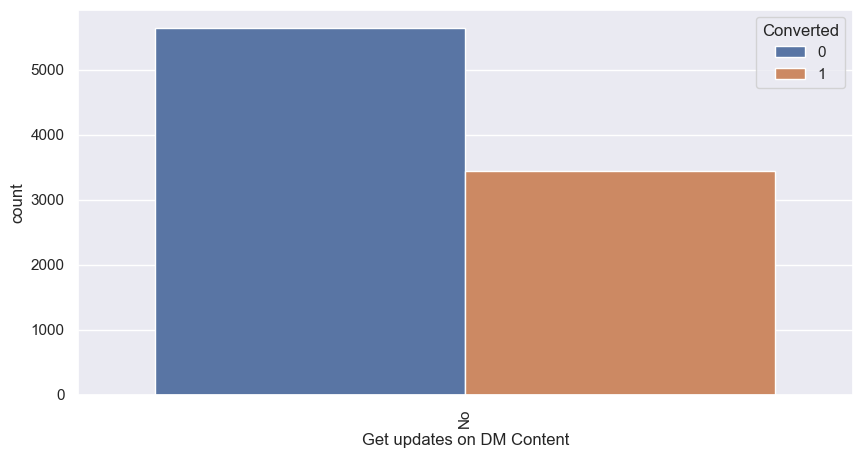

In [129]:
# Plotting Get updates on DM Content
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Get updates on DM Content',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [130]:
# Dropping the Column
Leads.drop('Get updates on DM Content',axis=1,inplace=True)

In [131]:
#### t. City

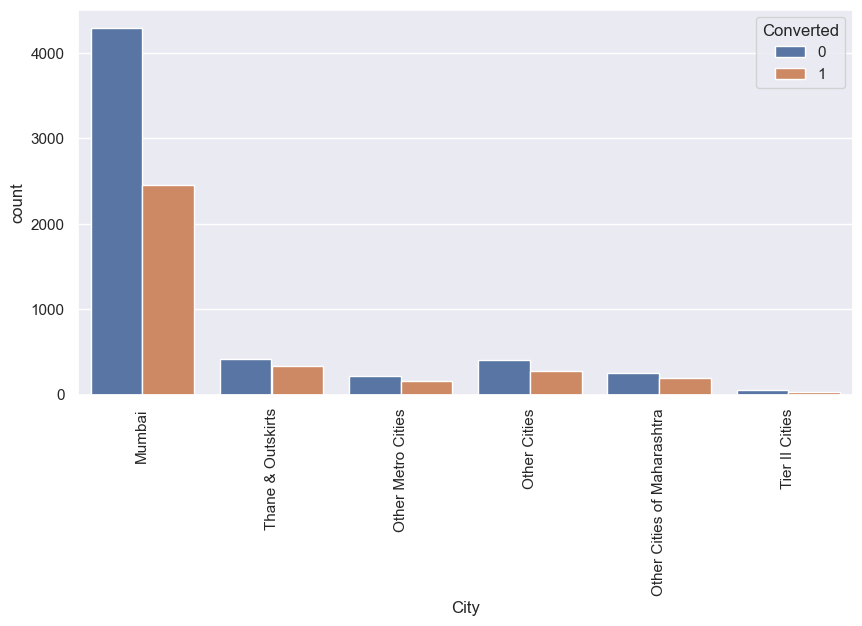

In [132]:
# Plotting City
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='City',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [133]:
#1. Majority of the leads are from Mumbai
#2. We wil consider this variable for modelling

In [134]:
#### u. I agree to pay the amount through cheque

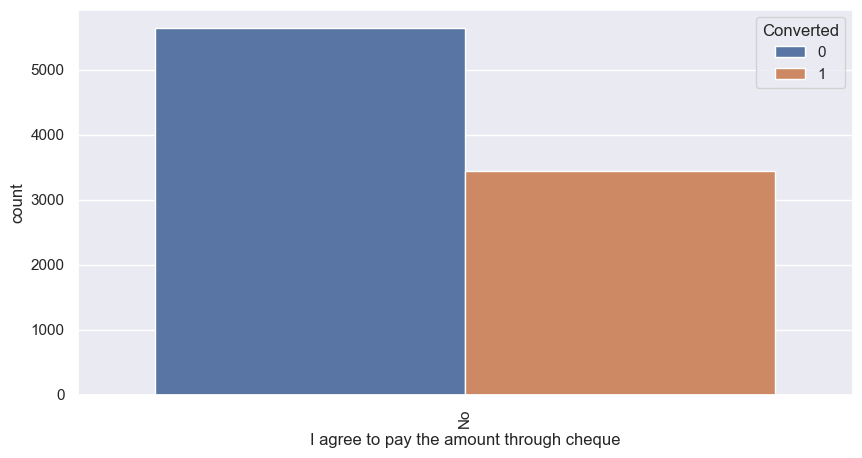

In [135]:
# I agree to pay the amount through cheque
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='I agree to pay the amount through cheque',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [136]:
# Dropping the Column
Leads.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [137]:
#### v. A free copy of Mastering The Interview

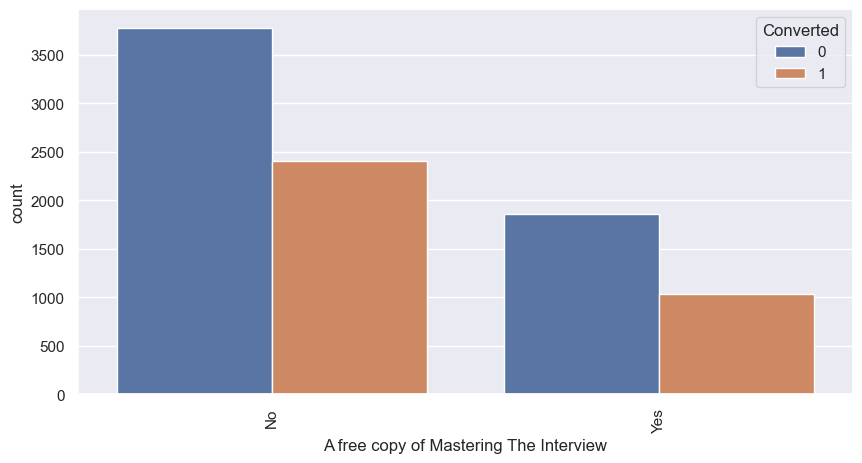

In [138]:
# Plotting A free copy of Mastering The Interview
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='A free copy of Mastering The Interview',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [139]:
##1. Majority of Leads selected No
##2. Column is useful in modelling

In [140]:
#### w. Last Notable Activity

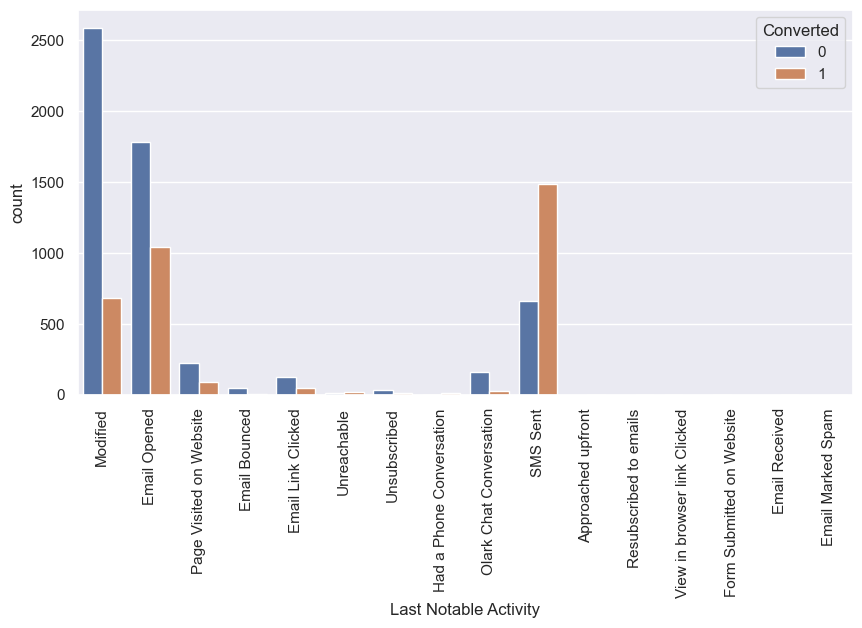

In [141]:
# Plotting the Last Notable Activity
plt.figure(figsize=[10,5])
sns.countplot(data=Leads,x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [142]:
#1. Last Notable activity with highest conversion rate - 'SMS sent'
#2. Last Notable activity of highest count of leads - 'Modified' or 'email opened'
#3. Will club the options with very low responses as 'Others'

In [143]:
Leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: proportion, dtype: float64

In [144]:
# Clubbing Featurs
Leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Email Received','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website'],'Others',inplace=True)

In [145]:
# Creating a list of categorical columns now left after univariate analysis
cat_column = Leads.select_dtypes(include='object').drop('Prospect ID',axis=1).columns
cat_column

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

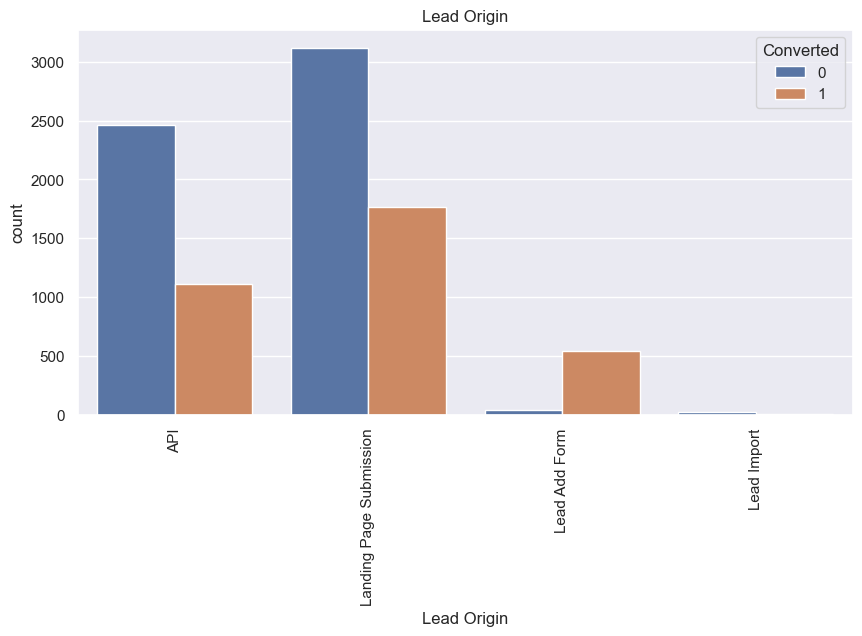

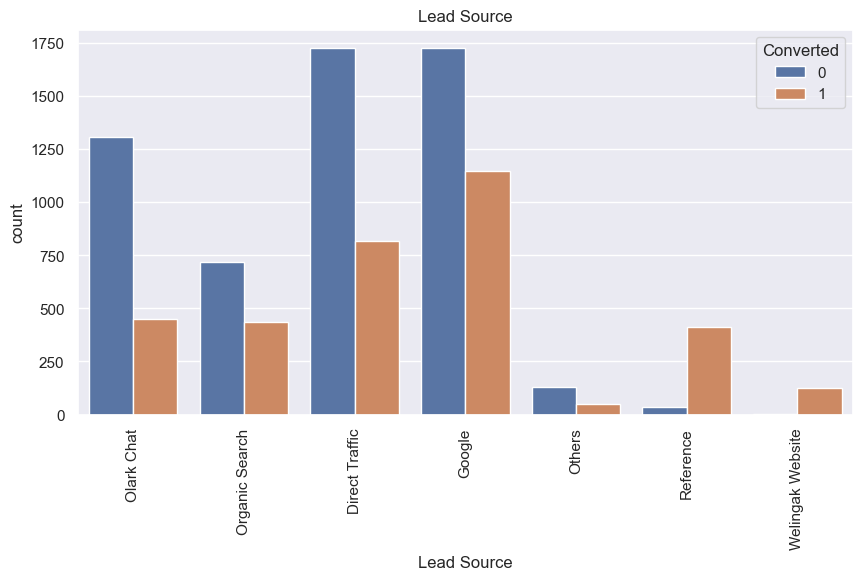

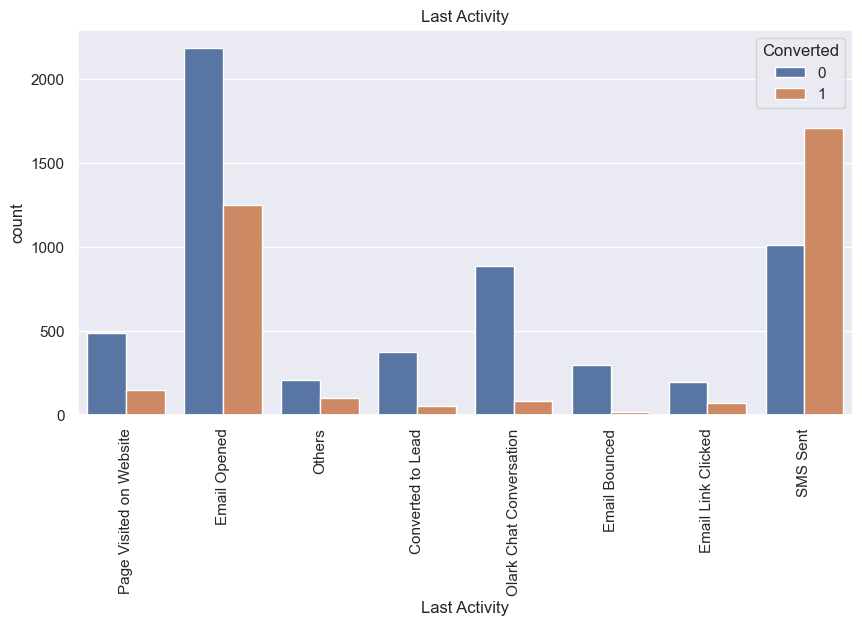

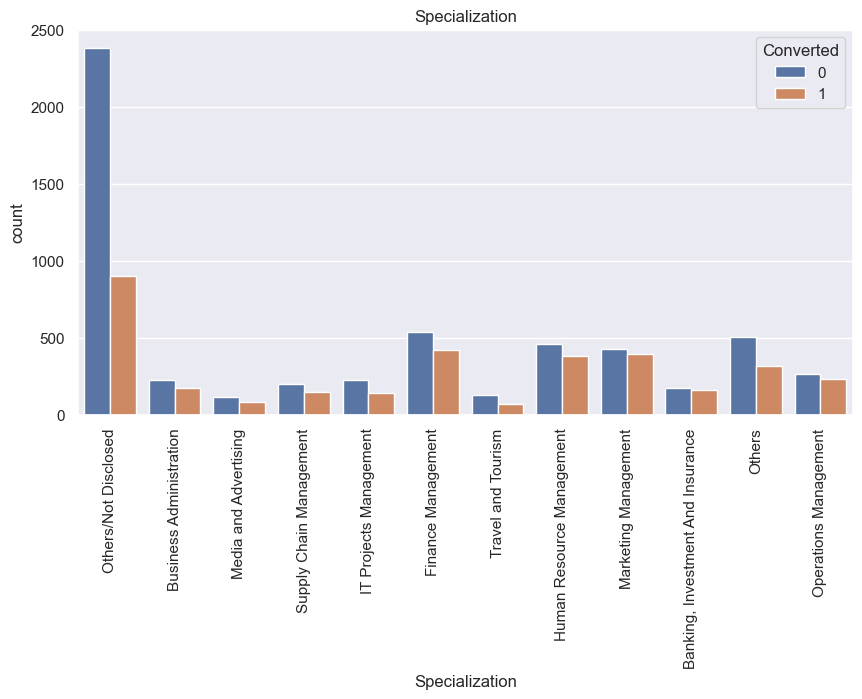

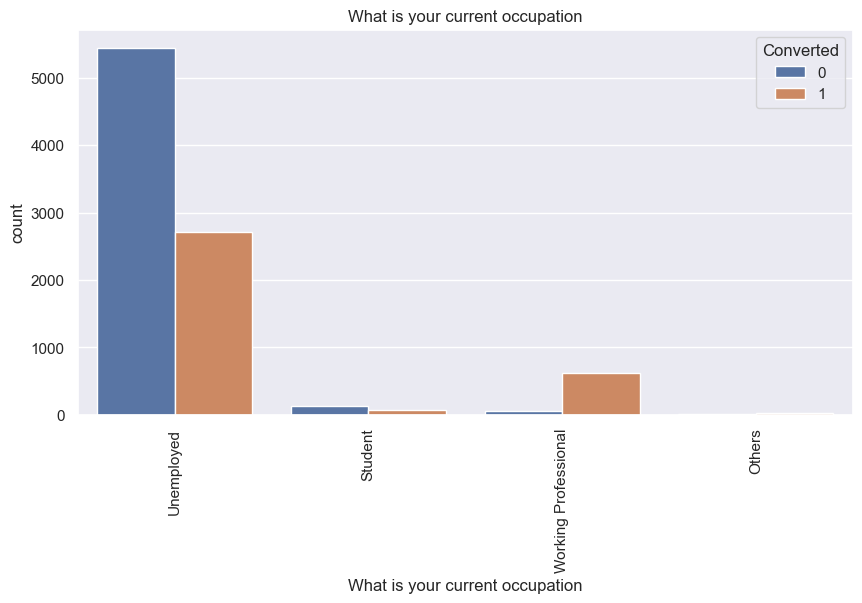

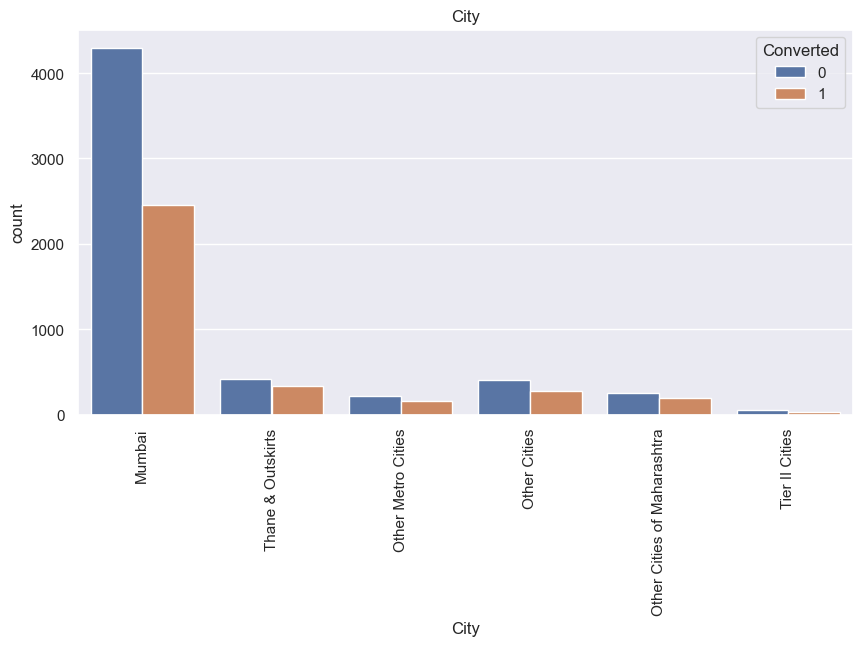

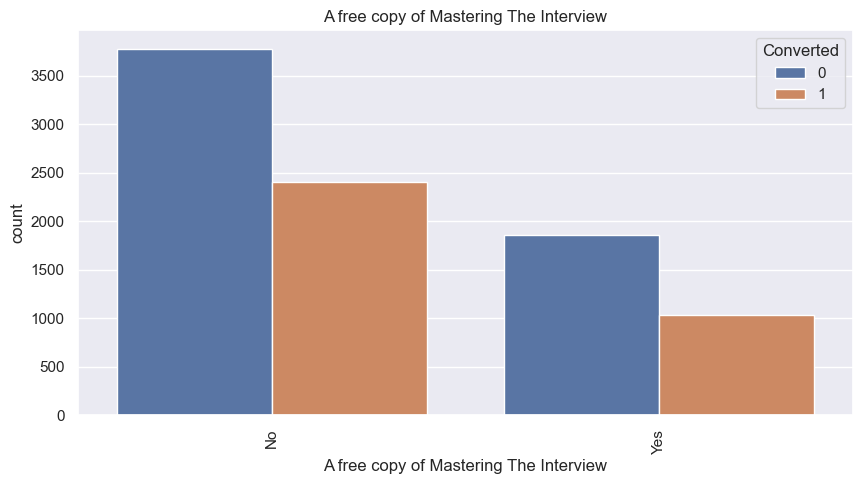

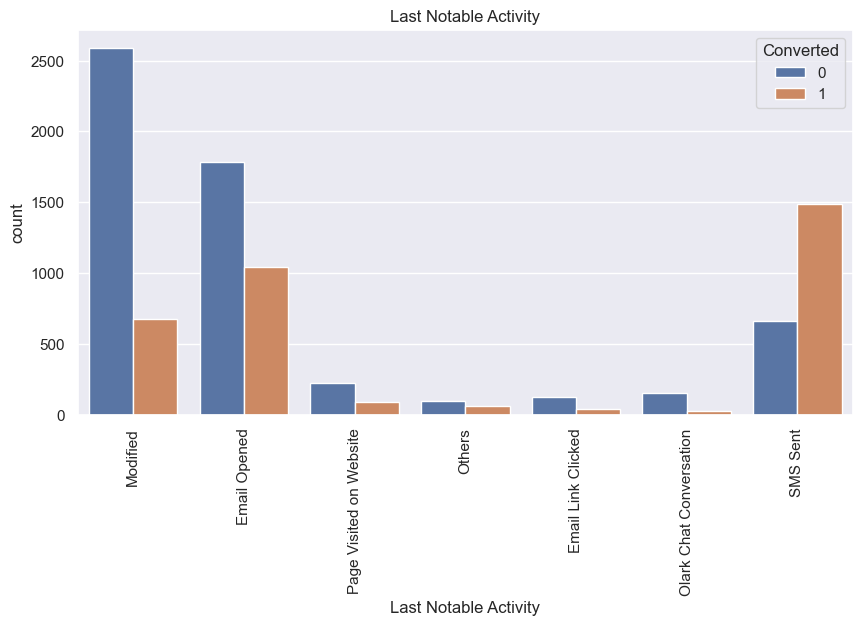

In [146]:
# Again Plotting the left out categorical column
for cat in cat_column:
    plt.figure(figsize=[10,5])
    sns.countplot(data=Leads,x=cat,hue='Converted')
    plt.xticks(rotation=90)
    plt.title(cat)
    plt.show()

In [147]:
### Univariate Analysis on Numerical Column

In [148]:
# Creating a list of numerical column;Removing Lead Number from numerical columns as it is not required for the univariate analysis and removing converted as we have already analyzed it above
num_column = Leads.select_dtypes(include=['int64','int32','float64']).drop(['Lead Number','Converted'],axis=1).columns
num_column

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

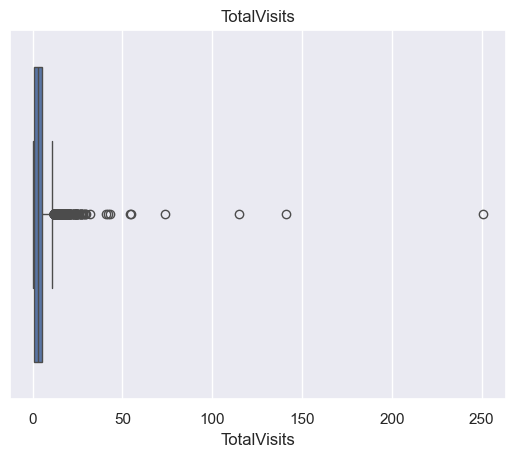

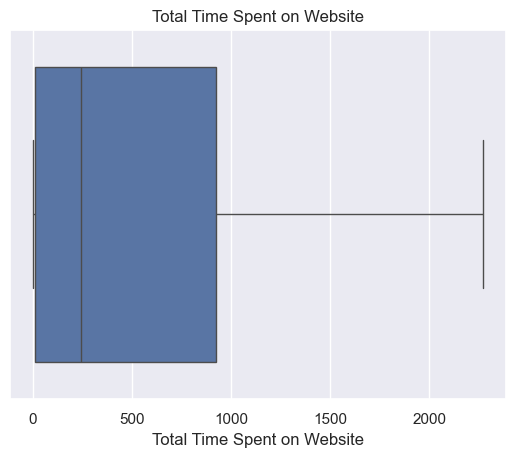

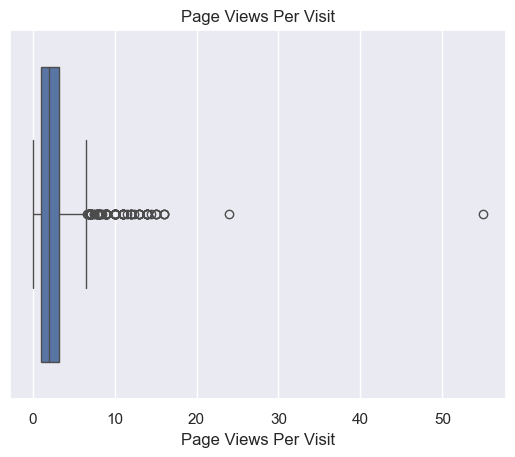

In [149]:
# Creating box-plot for the numerical column
for num in num_column:
    sns.boxplot(x=num,data=Leads)
    plt.title(num)
    plt.show()

In [150]:
#**Insights and Action**

#notice presence of outliers in TotalVisits, Page Views per visit

##- TotalVisits : will do capping of the upper range to 95 percentiles
##- Page View per visit : will perform capping of the upper range to 95 percentiles

In [151]:
# Capping of TotalVisit column with 95%ile
Q1 = Leads['TotalVisits'].quantile(0.95)
Leads['TotalVisits'][Leads['TotalVisits']>Q1]=Q1

In [152]:
# Capping of Page Views Per Visit column with 95%ile
Q1 = Leads['Page Views Per Visit'].quantile(0.95)
Leads['Page Views Per Visit'][Leads['Page Views Per Visit']>Q1]=Q1

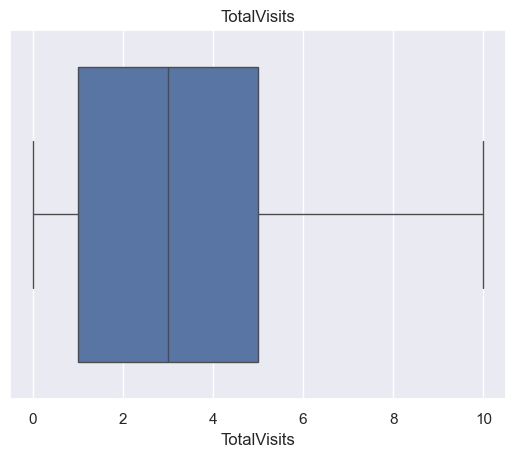

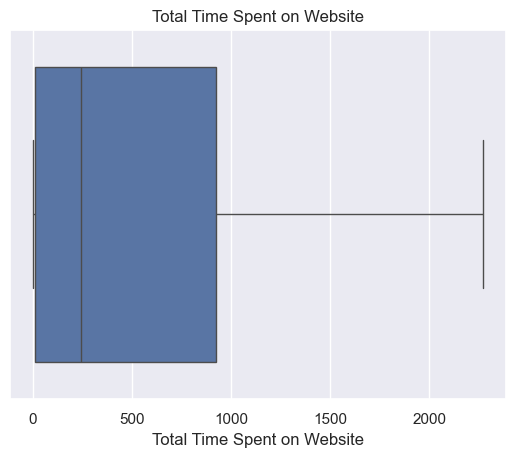

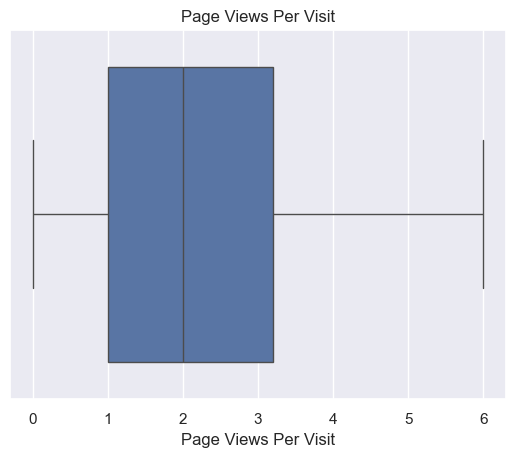

In [153]:
# Again Checking the box-plot of numerical columns
for num in num_column:
    sns.boxplot(x=num,data=Leads)
    plt.title(num)
    plt.show()

In [154]:
##Outliers have been treated

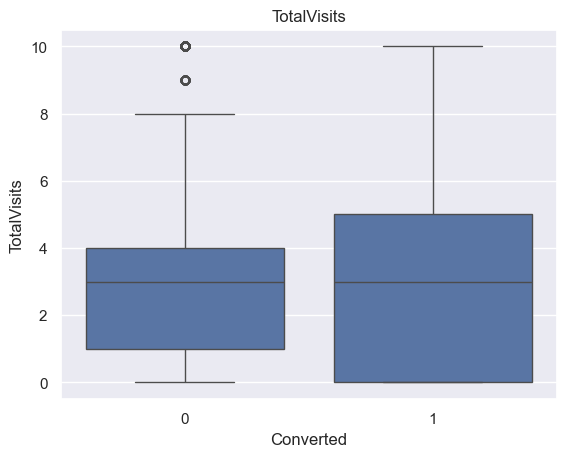

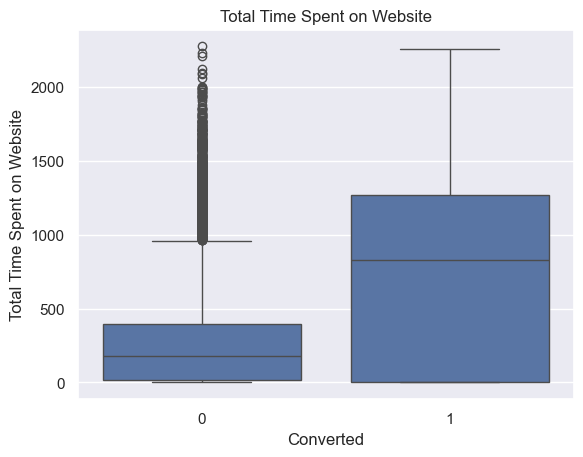

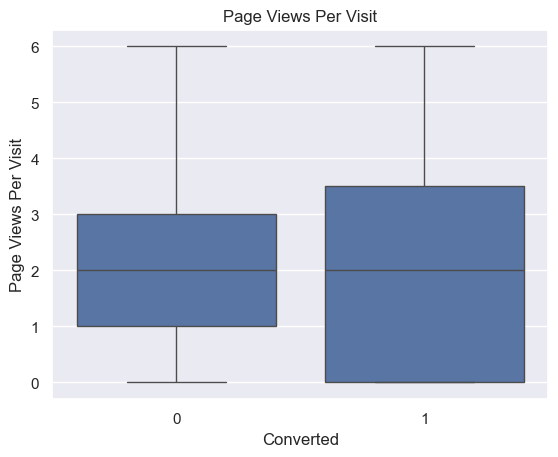

In [155]:
# Plotting the box-plot of numerical column Target Variable wise

for num in num_column:
    sns.boxplot(x='Converted',y=num ,data=Leads)
    plt.title(num)
    plt.show()

In [156]:
#**Insights**

#TotalVisits:
#- We can notice that median value is same for both 0 and 1, but the 75 percentile and top fence is higher for 1 indicating the converted leads do visit more
#- We will be using this column for modelling

#Total Time Spent on Website:
#- Those converted spends considerably more time than leads who were not converted
#- We will use this column for modelling

#Page Views Per Visit:
#- Median is almost same for both 0 and 1 but we can notice that 25th percentile is lesser and 75th percentile is higher for those who converted than 0
#- We will use this column for modelling

In [157]:
# Cheking the Dataframe
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0            0                            0   
1  Organic Search          0            5                          674   
2  Direct Traffic          1            2                         1532   
3  Direct Traffic          0            1                          305   
4          Google          1            2                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website     Others/Not Disclosed   
1                   2.5             Email Opened     Others/Not Disclosed   
2                   2.0             Email Opened  Business Administration   
3                   1.0                   Others    Media and Advertising   
4                   1.0        Converted to Lead     Others/Not Disclosed   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [158]:
# Cheking the Shape of Dataframe
Leads.shape

(9074, 14)

In [159]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   int32  
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   object 
 

In [160]:
# Step 4- EDA: Bivariate Analysis

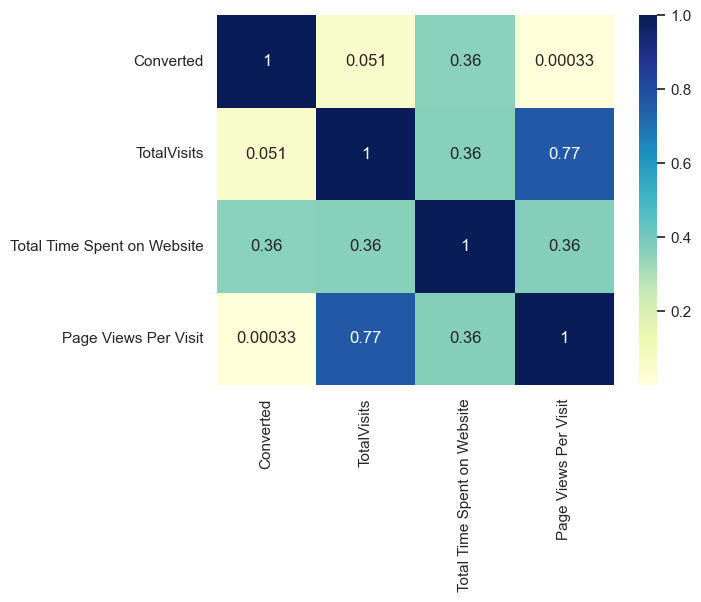

In [161]:
# Plotting the heat map on datafrane
leads1= Leads.select_dtypes(include=['int64','int32','float64']).drop(['Lead Number'],axis=1)
sns.heatmap(leads1.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [162]:
# Page View Per Visit has a good positive correlation with TotalVisits of 0.77

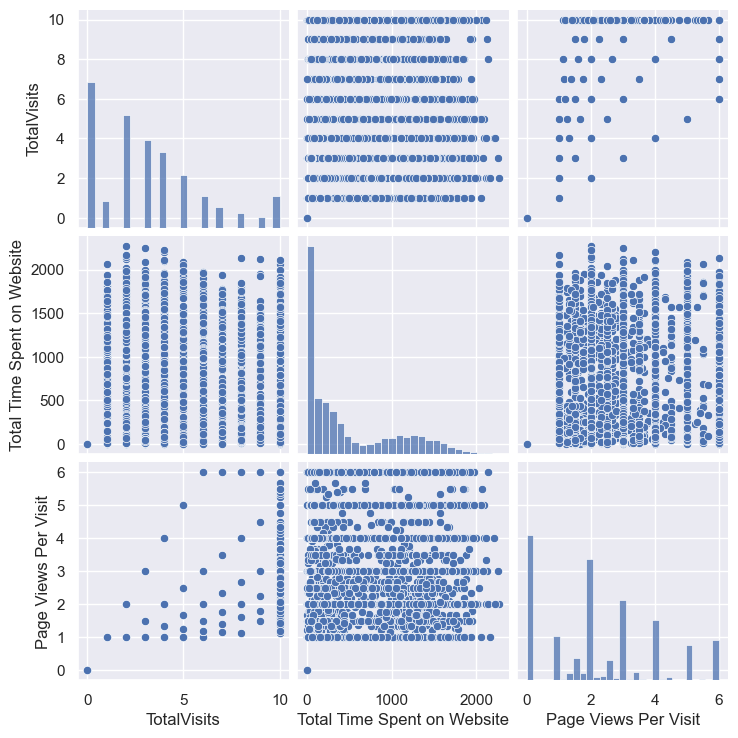

In [163]:
# Plotting the pairplot of numerical variable
sns.pairplot(Leads[num_column])
plt.show()

In [164]:
# linear relationship noted between Page Views per visit and TotalVisits

In [165]:
# Step 5- Data Preparation : Dummy Variable Creation

In [166]:
# Checking the datafrane
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0            0                            0   
1  Organic Search          0            5                          674   
2  Direct Traffic          1            2                         1532   
3  Direct Traffic          0            1                          305   
4          Google          1            2                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website     Others/Not Disclosed   
1                   2.5             Email Opened     Others/Not Disclosed   
2                   2.0             Email Opened  Business Administration   
3                   1.0                   Others    Media and Advertising   
4                   1.0        Converted to Lead     Others/Not Disclosed   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [167]:
# Converting yes/No to binary variable 
Leads['A free copy of Mastering The Interview']=Leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [168]:
#Creating the dummy variable for categorical columns and dropping the first one
dummy_df= pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']], drop_first=True)
dummy_df = dummy_df.astype(int)
dummy_df.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_Finance Management  \
0                                       0                                  0   
1                                       0                                  0   
2                                       1                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3   

In [169]:
# Merging dummy dataframe with Leads and dropping original categorical columns
df_new = pd.concat([Leads,dummy_df],axis=1)
df_new.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'],axis=1,inplace=True)

In [170]:
# Checking the shape of new dataframe
df_new.shape

(9074, 48)

In [171]:
## Step 6- Test-Train Split

In [172]:
# Split Dataframe into Test and train data frame
df_new_train,df_new_test = train_test_split(df_new,train_size =0.7,random_state=100)

In [173]:
# Putting Feature Variable in X
X_train=df_new_train.drop(['Prospect ID', 'Lead Number','Converted'],axis=1)

In [174]:
# Putting Feature Variable in y
y_train=df_new_train['Converted']

In [175]:
## Step 7- Feature Scaling

In [176]:
# Using Standardization
scaler = StandardScaler()

In [177]:
# Fit transform the Scaler into the required Variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [178]:
# Checking the Scaled X_train
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009    -0.432779                    -0.160255             -0.155018   
1012    -0.432779                    -0.540048             -0.155018   
9226    -1.150329                    -0.888650             -1.265540   
4750    -0.432779                     1.643304             -0.155018   
7987     0.643547                     2.017593              0.122613   

      A free copy of Mastering The Interview  \
3009                                       1   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
3009                        0                   0                       0   
1012                        0                   0                       0   
9226                        0                   0                       1   
4750                        0                   0                       0   
7987                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
3009                           0                   0                      0   
1012                           0                   0                      0   
9226                           0                   0                      0   
4750                           0                   0                      0   
7987                           0                   0                      0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3009                             0                            0   
1012                             0                            1   
9226                             0                            0   
4750                             0                            0   
7987                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3009                                 0                           1   
1012                                 0                           0   
9226                                 0                           0   
4750                                 0                           0   
7987                                 0                           0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
3009                                      0                     0   
1012                                      0                     0   
9226                                      0                     0   
4750                                      0                     0   
7987                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3009                                      0                       0   
1012                                      0                       0   
9226                                      0                       1   
4750                                      0                       1   
7987                                      0                       1   

      Specialization_Business Administration  \
3009                                       0   
1012                                       0   
9226                                       0   
4750                                       0   
7987   

In [358]:
## Step 8- Looking at Correlations

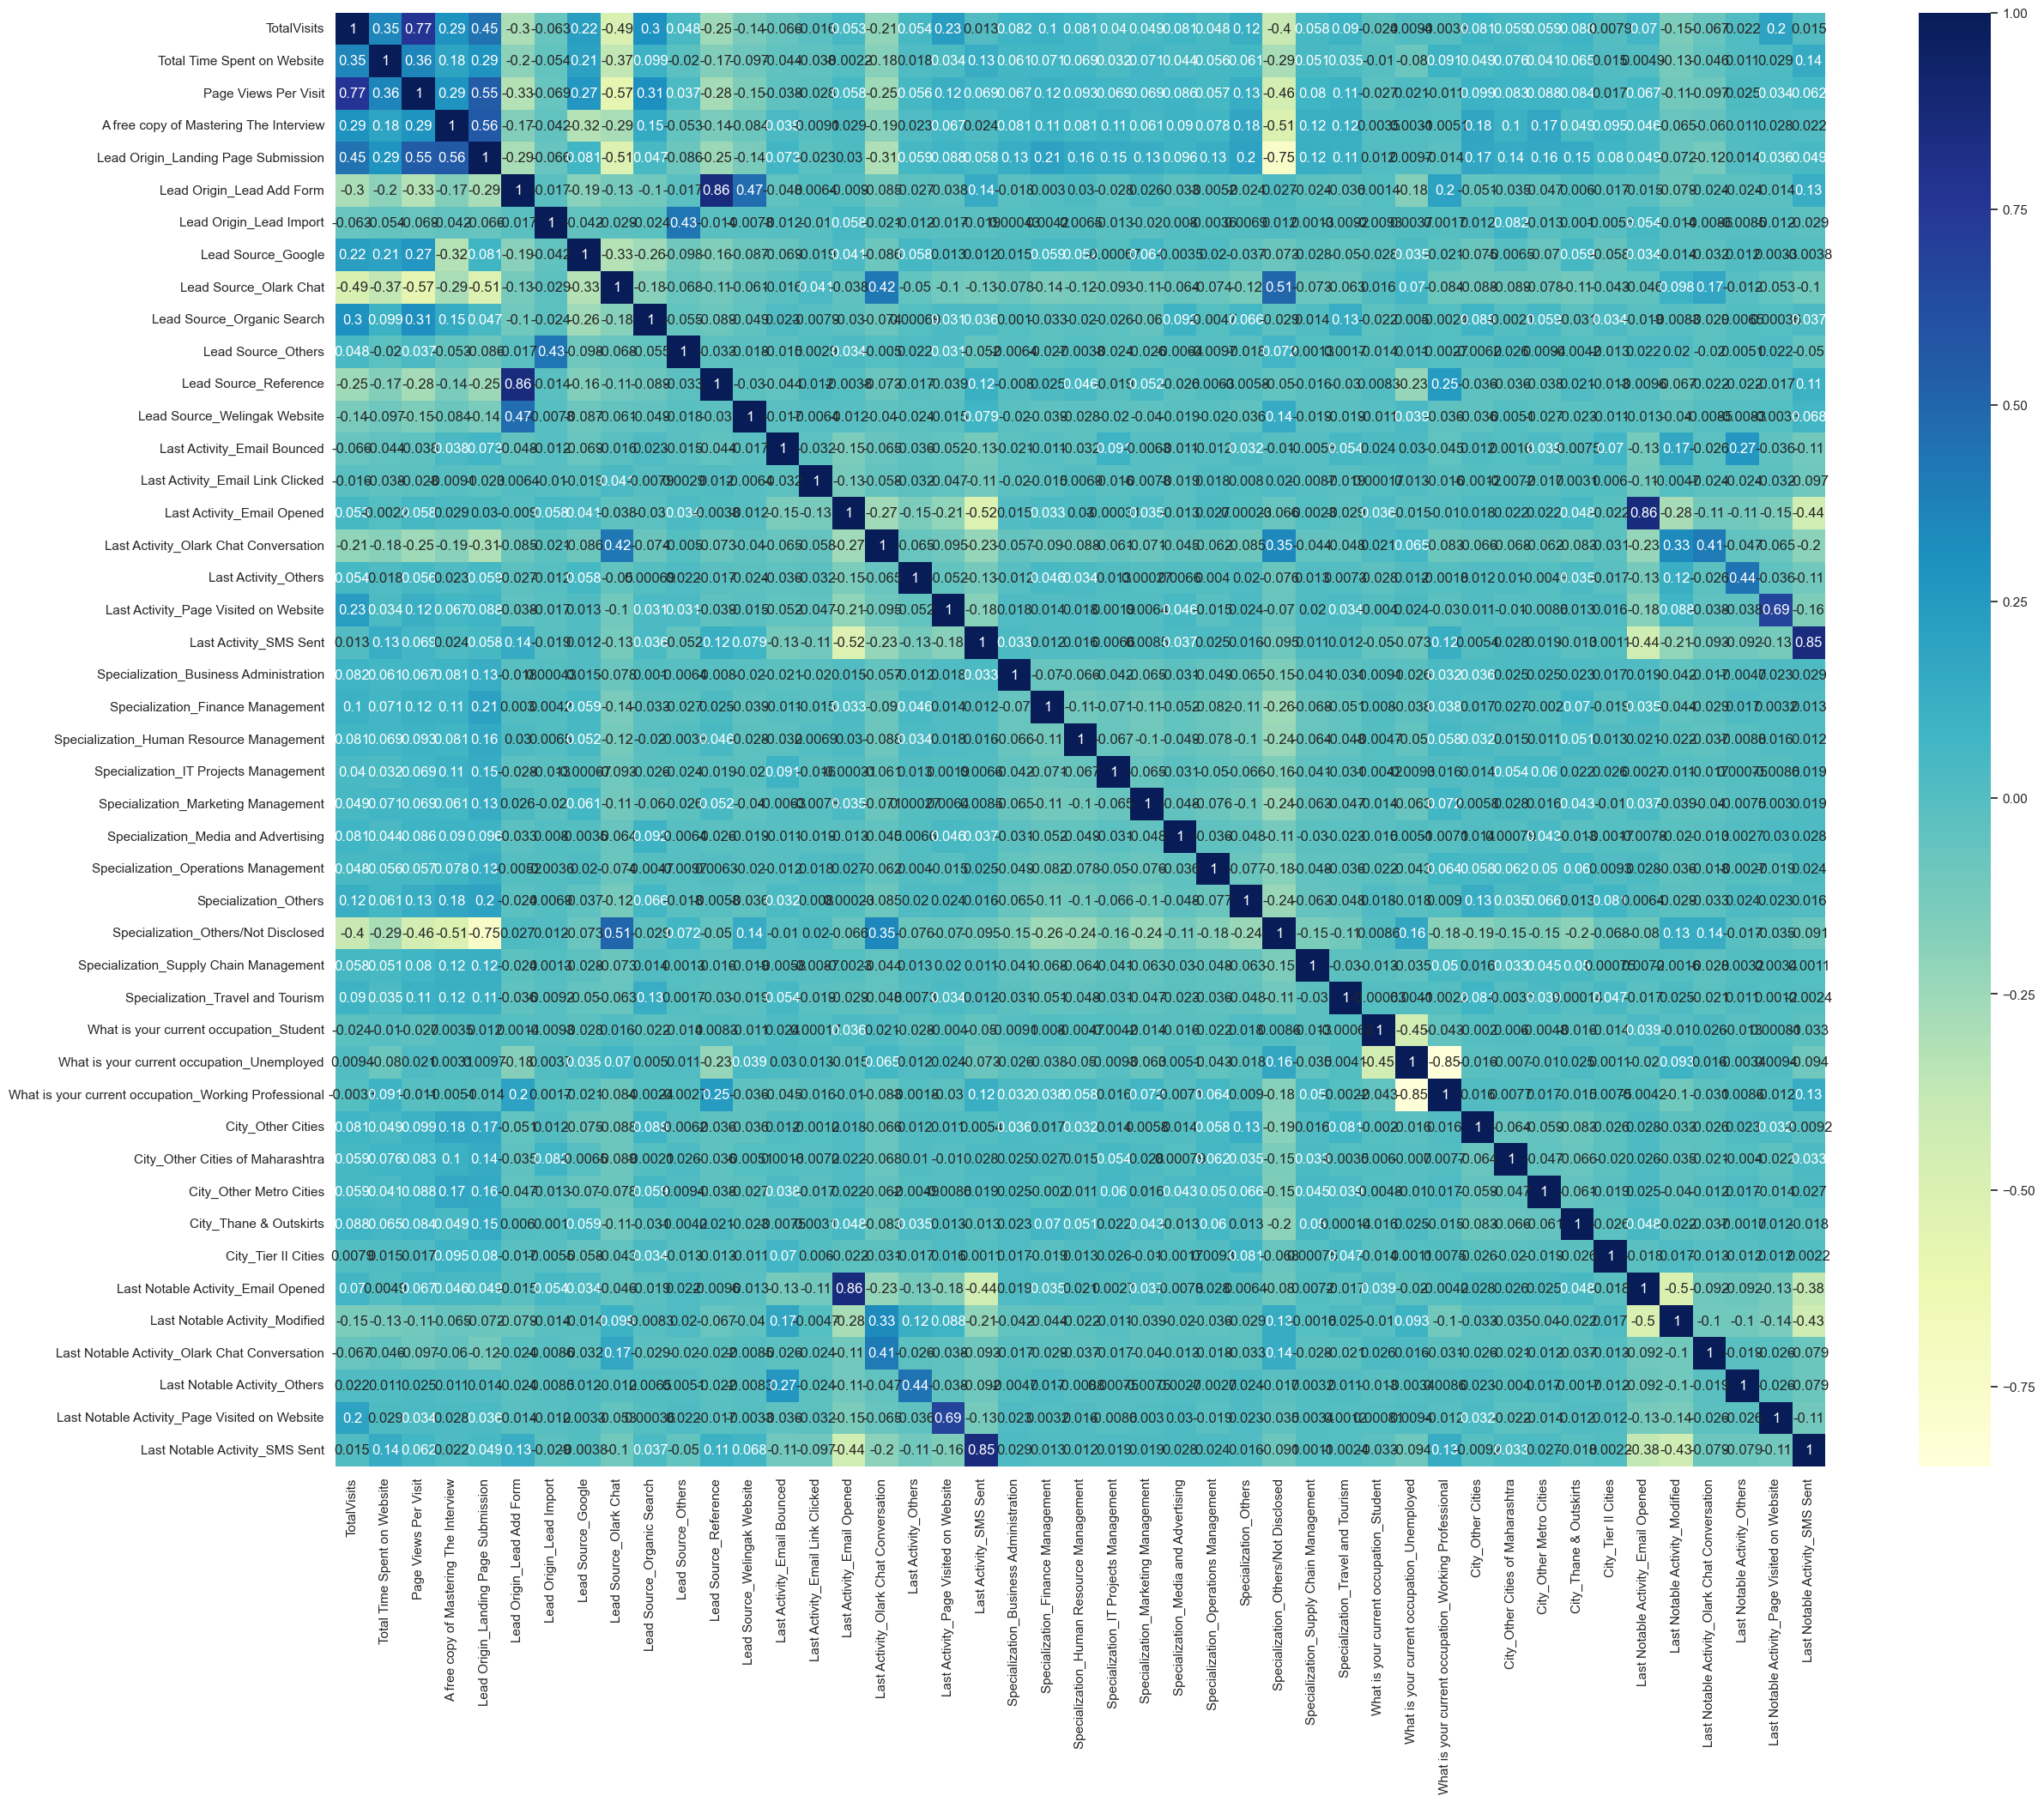

In [360]:
#Checking the correlation between different variables
plt.figure(figsize=[28,22],)
sns.heatmap(X_train.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [362]:
#1. Lead Source_Reference and Lead Origin_Lead Add Form are having a strong positive correlaton of 86%
#2. Last Notable Activiy_SMS Sent and  Last Activity_SMS Sent are having a strong positive correlation of 85%
#3. What is your current occupation_Working Professional and What is your current occupation_Unemployed are having a strong negative correlation of - 85%
#4. Last Notable Activity_Email Opened and Last Activity_Email Opened are having a strong poisitive correlation of 0.86

##Hence dropping 'Lead Origin_Lead Add Form','Last Activity_SMS Sent','What is your current occupation_Unemployed','Last Activity_Email Opened'

In [366]:
# Dropping 'Lead Origin_Lead Add Form','Last Activity_SMS Sent'and 'What is your current occupation_Unemployed'
X_train.drop(['Lead Origin_Lead Add Form','Last Activity_SMS Sent','What is your current occupation_Unemployed','Last Activity_Email Opened'],axis=1,inplace=True)

In [368]:
## Step 9- Model Building : Logistic Regression modelling, RFE

In [370]:
# Logistic Regression model 1
LRM1 = sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
LRM1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.4
Date:                Sun, 15 Dec 2024   Deviance:                       5198.9
Time:                        11:38:05   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4022
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4574      0.510     -0.898      0.369      -1.456       0.541
TotalVisits                                              0.3399      0.056      6.079      0.000       0.230       0.449
Total Time Spent on Website                              1.1066      0.041     27.193      0.000       1.027       1.186
Page Views Per Visit                                    -0.3216      0.062     -5.146      0.000      -0.444      -0.199
A free copy of Mastering The Interview                  -0.1978      0.109     -1.811      0.070      -0.412       0.016
Lead Origin_Landing Page Submission                     -0.9263      0.136     -6.798      0.000      -1.193      -0.659
Lead Origin_Lead Import                                  0.9911      0.554      1.790      0.073      -0.094       2.076
Lead Source_Google                                       0.2635      0.114      2.310      0.021       0.040       0.487
Lead Source_Olark Chat                                   1.3198      0.166      7.966      0.000       0.995       1.645
Lead Source_Organic Search                               0.1206      0.132      0.917      0.359      -0.137       0.378
Lead Source_Others                                       0.2034      0.295      0.689      0.491      -0.376       0.782
Lead Source_Reference                                    3.5628      0.270     13.194      0.000       3.034       4.092
Lead Source_Welingak Website                             6.0531      0.736      8.222      0.000       4.610       7.496
Last Activity_Email Bounced                             -2.6085      0.452     -5.768      0.000      -3.495      -1.722
Last Activity_Email Link Clicked                        -0.2096      0.381     -0.551      0.582      -0.956       0.536
Last Activity_Olark Chat Conversation                   -1.2998      0.199     -6.525      0.000      -1.690      -0.909
Last Activity_Others                                    -0.2501      0.244     -1.026      0.305      -0.728       0.228
Last Activity_Page Visited on Website                   -0.4303      0.218     -1.970      0.049      -0.858      -0.002
Specialization_Business Administration                  -0.3409      0.243     -1.403      0.161      -0.817       0.136
Specialization_Finance Management                       -0.1839      0.203     -0.906      0.365      -0.582       0.214
Specialization_Human Resource Management                -0.1979      0.205     -0.963      0.335      -0.601       0.205
Specialization_IT Projects Management                   -0.1407      0.248     -0.567      0.571      -0.627       0.346
Specialization_Marketing Management                     -0

In [374]:
#Running RFE with number of output variables as 15
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 13),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_Finance Management', False, 18),
 ('Specialization_Human Resource Management', False, 17),
 ('Specialization_IT Projects Management', False, 20),
 ('Specialization_Marketing Management', False, 26),
 ('

In [376]:
#Creating a list for the top 15 variables
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Others/Not Disclosed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [378]:
# Preparing X for the top 15 column
X_train = X_train[col]

In [380]:
# Logistic Regression model 2
LRM2 = sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
LRM2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.3
Date:                Sun, 15 Dec 2024   Deviance:                       5272.6
Time:                        11:39:49   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1588      0.128     -1.239      0.215      -0.410       0.092
Total Time Spent on Website                              1.1067      0.040     27.517      0.000       1.028       1.185
Lead Origin_Landing Page Submission                     -1.1585      0.128     -9.057      0.000      -1.409      -0.908
Lead Origin_Lead Import                                  0.9744      0.476      2.047      0.041       0.042       1.907
Lead Source_Olark Chat                                   1.1097      0.123      9.048      0.000       0.869       1.350
Lead Source_Reference                                    3.3530      0.241     13.890      0.000       2.880       3.826
Lead Source_Welingak Website                             5.8267      0.727      8.016      0.000       4.402       7.251
Last Activity_Email Bounced                             -2.4656      0.417     -5.911      0.000      -3.283      -1.648
Last Activity_Olark Chat Conversation                   -1.2654      0.170     -7.461      0.000      -1.598      -0.933
Last Activity_Page Visited on Website                   -0.3831      0.144     -2.655      0.008      -0.666      -0.100
Specialization_Others/Not Disclosed                     -1.1492      0.125     -9.226      0.000      -1.393      -0.905
What is your current occupation_Working Professional     2.5898      0.193     13.425      0.000       2.212       2.968
City_Tier II Cities                                     -0.6427      0.443     -1.450      0.147      -1.512       0.226
Last Notable Activity_Modified                          -0.4320      0.087     -4.980      0.000      -0.602      -0.262
Last Notable Activity_Others                             1.0463      0.269      3.887      0.000       0.519       1.574
Last Notable Activity_SMS Sent                           1.3698      0.086     15.942      0.000       1.201       1.538
========================================================================================================================
"""

In [382]:
#City_Tier II Cities is insignificant as p value is greater than 0.05 thus will remove it

In [386]:
X_train.drop('City_Tier II Cities',axis=1,inplace=True)

In [388]:
# Logistic Regression model 3
LRM3 = sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
LRM3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.4
Date:                Sun, 15 Dec 2024   Deviance:                       5274.8
Time:                        11:40:51   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1583      0.128     -1.235      0.217      -0.410       0.093
Total Time Spent on Website                              1.1066      0.040     27.528      0.000       1.028       1.185
Lead Origin_Landing Page Submission                     -1.1648      0.128     -9.110      0.000      -1.415      -0.914
Lead Origin_Lead Import                                  0.9740      0.476      2.047      0.041       0.041       1.907
Lead Source_Olark Chat                                   1.1095      0.123      9.047      0.000       0.869       1.350
Lead Source_Reference                                    3.3527      0.241     13.890      0.000       2.880       3.826
Lead Source_Welingak Website                             5.8271      0.727      8.016      0.000       4.402       7.252
Last Activity_Email Bounced                             -2.4932      0.416     -5.997      0.000      -3.308      -1.678
Last Activity_Olark Chat Conversation                   -1.2653      0.170     -7.461      0.000      -1.598      -0.933
Last Activity_Page Visited on Website                   -0.3867      0.144     -2.680      0.007      -0.669      -0.104
Specialization_Others/Not Disclosed                     -1.1483      0.125     -9.218      0.000      -1.392      -0.904
What is your current occupation_Working Professional     2.5861      0.193     13.425      0.000       2.209       2.964
Last Notable Activity_Modified                          -0.4327      0.087     -4.989      0.000      -0.603      -0.263
Last Notable Activity_Others                             1.0555      0.269      3.923      0.000       0.528       1.583
Last Notable Activity_SMS Sent                           1.3668      0.086     15.917      0.000       1.199       1.535
========================================================================================================================
"""

In [392]:
#All coefficients are significant

#Features/Dummy Variables with highest coefficients : Lead Source_Welingak Website, Lead Source_Reference, What is your current occupation_Working Professional

In [394]:
#### Checking VIF

In [396]:
# Preparing the new Dataframe for VIF
VIF = pd.DataFrame()
VIF['Feature'] = X_train.columns
VIF['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF',ascending = False)
VIF

Feature   VIF
9                 Specialization_Others/Not Disclosed  2.25
11                     Last Notable Activity_Modified  2.09
3                              Lead Source_Olark Chat  2.04
1                 Lead Origin_Landing Page Submission  1.86
13                     Last Notable Activity_SMS Sent  1.65
7               Last Activity_Olark Chat Conversation  1.59
0                         Total Time Spent on Website  1.30
4                               Lead Source_Reference  1.24
6                         Last Activity_Email Bounced  1.20
10  What is your current occupation_Working Profes...  1.19
8               Last Activity_Page Visited on Website  1.13
12                       Last Notable Activity_Others  1.13
5                        Lead Source_Welingak Website  1.09
2                             Lead Origin_Lead Import  1.01

In [400]:
#Both p Value and VIF is less than threshold 

In [402]:
# Predicting the y using the model LRM3
res = LRM3.fit()
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred

3009    0.182358
1012    0.127800
9226    0.166142
4750    0.865561
7987    0.617032
1281    0.742352
2880    0.091255
4971    0.964953
7536    0.846788
1248    0.574521
1429    0.576554
2178    0.024207
8554    0.079226
5044    0.546438
3475    0.932167
7424    0.423545
421     0.132606
3591    0.120525
6247    0.064827
7843    0.357060
1306    0.678438
2488    0.053226
2250    0.074633
7920    0.129371
2198    0.665677
5274    0.067078
1611    0.154805
3063    0.637756
1235    0.053226
3923    0.773961
1732    0.097169
5212    0.810145
9155    0.549586
3457    0.192606
1549    0.283519
341     0.142488
1187    0.037659
279     0.197065
8501    0.071184
2207    0.234954
5650    0.234954
8357    0.009304
7121    0.919674
5698    0.987996
3575    0.972822
7145    0.234954
6579    0.715703
1238    0.053226
5019    0.996388
8787    0.990350
5215    0.096771
5775    0.234954
5461    0.793897
7464    0.166142
5555    0.126436
8695    0.016200
5986    0.103728
4703    0.317985
2411    0.9278

In [404]:
# Preparing the dataframe for Lead predicion using probability cut off as 0.5
y_train_predicted = pd.DataFrame({'Converted':y_train,'Conversion_probability':y_train_pred,'Lead Number':df_new_train['Lead Number']})
y_train_predicted['Predicted'] = y_train_predicted['Conversion_probability'].apply(lambda x : 1 if x>0.5 else 0)
y_train_predicted.head()

Converted  Conversion_probability  Lead Number  Predicted
3009          0                0.182358       630949          0
1012          0                0.127800       649355          0
9226          0                0.166142       579735          0
4750          1                0.865561       614238          1
7987          1                0.617032       588625          1

In [406]:
# Creating the confusion matrics
confusion_mat = metrics.confusion_matrix(y_train_predicted['Converted'],y_train_predicted['Predicted'])
confusion_mat

array([[3467,  438],
       [ 739, 1707]], dtype=int64)

In [408]:
# Accuracy Score
metrics.accuracy_score(y_train_predicted['Converted'],y_train_predicted['Predicted'])

0.8146748543536451

In [414]:
#Achieved an accuracy of 81.47% on using cut off as 0.5

In [416]:
# True Postive, True Negatve, False Positive and False Negative
TP = confusion_mat[1,1]
FP = confusion_mat[0,1]
TN = confusion_mat[0,0]
FN = confusion_mat[1,0]

In [418]:
# Sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.6978740801308259

In [422]:
#Sensitivity of model(with cut off as 0.5): 69.79%

In [424]:
# Specificity
Specificity = TN/(TN+FP)
Specificity

0.8878361075544174

In [426]:
#Specificity of model(with cut off as 0.5): 88.78%

In [428]:
#False Positive Rate
FP/float(TN+FP)

0.11216389244558259

In [430]:
#Positive predictive value
TP/float(TP+FP)

0.7958041958041958

In [432]:
#Negative predictive value
TN/float(TN+FN)

0.8242986210175939

In [434]:
## Step 10- ROC curve

In [436]:
# Defining function for plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

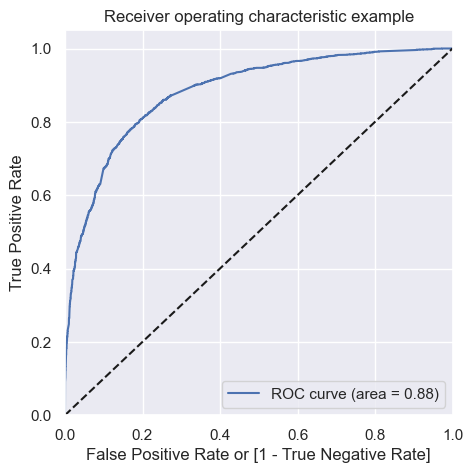

In [438]:
# Plotting the ROC Curve
draw_roc(y_train_predicted['Converted'],y_train_predicted['Conversion_probability'])

In [440]:
#From the ROC curve we can see that the area under the curve is quite high which indicates that the model is pretty accurate

#ROC curve follows the left-hand border and then the top border, indicating a good model

In [442]:
## Step 11- Finding Optimal Cut off point

In [444]:
# Let's create columns with different probability cutoffs 
number = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in number:
    y_train_predicted[i] = y_train_predicted['Conversion_probability'].apply(lambda x : 1 if x>i else 0)

y_train_predicted.head()

Converted  Conversion_probability  Lead Number  Predicted  0.1  0.2  \
3009          0                0.182358       630949          0    1    0   
1012          0                0.127800       649355          0    1    0   
9226          0                0.166142       579735          0    1    0   
4750          1                0.865561       614238          1    1    1   
7987          1                0.617032       588625          1    1    1   

      0.3  0.4  0.5  0.6  0.7  0.8  0.9  
3009    0    0    0    0    0    0    0  
1012    0    0    0    0    0    0    0  
9226    0    0    0    0    0    0    0  
4750    1    1    1    1    1    1    0  
7987    1    1    1    1    0    0    0

In [446]:
# Creating the columns of Datafrane
cutoff = pd.DataFrame(columns= ['probability','accuracy','sensitivity','specificity'])

In [448]:
# Creating the Dataframe
for i in number:
    confusion_metrics = metrics.confusion_matrix(y_train_predicted['Converted'],y_train_predicted[i])
    TP = confusion_metrics[1,1]
    FP = confusion_metrics[0,1]
    TN = confusion_metrics[0,0]
    FN = confusion_metrics[1,0]
    accuracy = metrics.accuracy_score(y_train_predicted['Converted'],y_train_predicted[i])
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    cutoff.loc[i]= [i,accuracy,sensi,speci]
cutoff

probability  accuracy  sensitivity  specificity
0.1          0.1  0.604314     0.969747     0.375416
0.2          0.2  0.743977     0.905969     0.642510
0.3          0.3  0.792631     0.847097     0.758515
0.4          0.4  0.811841     0.773917     0.835595
0.5          0.5  0.814675     0.697874     0.887836
0.6          0.6  0.795150     0.587899     0.924968
0.7          0.7  0.781452     0.512674     0.949808
0.8          0.8  0.760668     0.421913     0.972855
0.9          0.9  0.721776     0.296811     0.987964

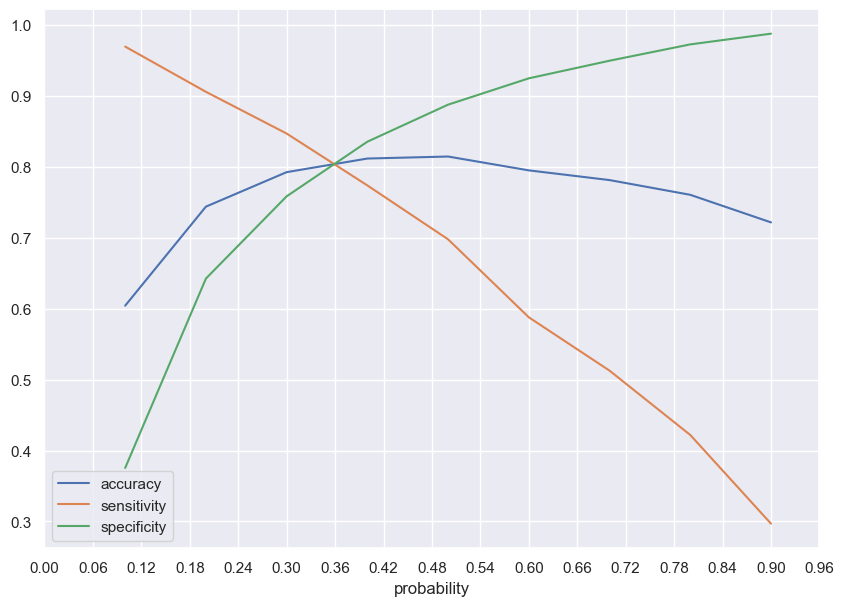

In [450]:
#Plotting graph for determining the optimal cut off point
cutoff.plot.line(x='probability',y=['accuracy','sensitivity','specificity'],figsize=(10,7))
plt.xticks(np.arange(0, 1, step=0.06))
plt.show()

In [454]:
#**From the curve, we can assume the optimal cut off point to be 0.36**

In [456]:
# Making prediction basis on the determined cut off point
y_train_predicted['Final_Predicted'] = y_train_predicted['Conversion_probability'].apply(lambda x : 1 if x>0.36 else 0)
y_train_predicted.head()

Converted  Conversion_probability  Lead Number  Predicted  0.1  0.2  \
3009          0                0.182358       630949          0    1    0   
1012          0                0.127800       649355          0    1    0   
9226          0                0.166142       579735          0    1    0   
4750          1                0.865561       614238          1    1    1   
7987          1                0.617032       588625          1    1    1   

      0.3  0.4  0.5  0.6  0.7  0.8  0.9  Final_Predicted  
3009    0    0    0    0    0    0    0                0  
1012    0    0    0    0    0    0    0                0  
9226    0    0    0    0    0    0    0                0  
4750    1    1    1    1    1    1    0                1  
7987    1    1    1    1    0    0    0                1

In [458]:
# Accuracy
metrics.accuracy_score(y_train_predicted['Converted'],y_train_predicted['Final_Predicted'])

0.8050700677058731

In [460]:
# Confusion matrix
cm = metrics.confusion_matrix(y_train_predicted['Converted'],y_train_predicted['Final_Predicted'])
cm

array([[3154,  751],
       [ 487, 1959]], dtype=int64)

In [462]:
# True Postive, True Negatve, False Positive and False Negative
FP = cm[0,1]
FN = cm[1,0] 
TP = cm[1,1]
TN = cm[0,0]

In [464]:
# Sensitivity
Sensitivity = TP/float(TP+FN)
Sensitivity

0.8008994276369583

In [466]:
# Specificity
Specificity = TN/float(TN+FP)
Specificity

0.8076824583866837

In [468]:
#False Positive Rate
FP/float(TN+FP)

0.19231754161331627

In [470]:
#Positive predicted value
TP/float(TP+FP)

0.7228782287822878

In [472]:
#Negative predictive value
TN/float(TN+FN)

0.866245536940401

In [474]:
##**Precision and Recall**

In [476]:
# Precesion for cut-off 0.36
Precesion = metrics.precision_score(y_train_predicted['Converted'],y_train_predicted['Final_Predicted'])
Precesion

0.7228782287822878

In [478]:
# Recall for cut-off 0.36
Recall = metrics.recall_score(y_train_predicted['Converted'],y_train_predicted['Final_Predicted'])
Recall

0.8008994276369583

In [480]:
#  Plotting the precission and recall curve
p,r,t = metrics.precision_recall_curve(y_train_predicted['Converted'],y_train_predicted['Conversion_probability'])

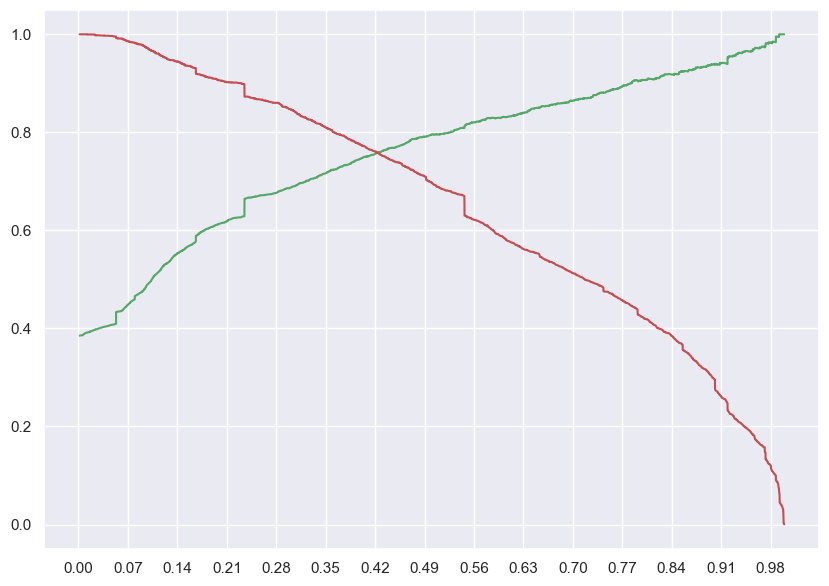

In [482]:
plt.figure(figsize=(10,7))
plt.plot(t, p[:-1], "g-")
plt.plot(t, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.07))
plt.show()

In [484]:
#From the above graph we can notice the cut off point to be around 0.42

In [486]:
##**We saw two views of evaluation metrics**
#- Sensitivity-Specificity view : Cut off 0.36
#- Precision-Recall view : Cut off 0.42
    
#We are considering Sensitivity and Specificity view of things thus finalizing on the cut off as 0.36

In [488]:
## Step 12- Making predictions on the test set

In [492]:
X_test=df_new_test.drop(['Prospect ID', 'Lead Number','Converted'],axis=1)

In [494]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3271     0.284772                    -0.600595              0.955505   
1490     0.643547                     1.887326              1.510766   
7936    -0.432779                    -0.752879             -0.155018   
4216    -1.150329                    -0.888650             -1.265540   
3830     1.719873                    -0.587751              2.066027   

      A free copy of Mastering The Interview  \
3271                                       0   
1490                                       1   
7936                                       0   
4216                                       0   
3830                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
3271                        0                   1                       0   
1490                        0                   0                       0   
7936                        0                   1                       0   
4216                        0                   0                       0   
3830                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
3271                           0                   0                      0   
1490                           0                   0                      0   
7936                           0                   0                      0   
4216                           0                   0                      1   
3830                           1                   0                      0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3271                             0                            0   
1490                             0                            0   
7936                             0                            0   
4216                             0                            0   
3830                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3271                                 0                           1   
1490                                 0                           1   
7936                                 0                           1   
4216                                 0                           1   
3830                                 0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
3271                                      0                     0   
1490                                      0                     0   
7936                                      0                     0   
4216                                      0                     0   
3830                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      Specialization_Business Administration  \
3271                                       0   
1490                                       0   
7936                                       0   
4216                                       0   
3830   

In [496]:
# Putting Feature Variable in X_test
X_test = X_test[X_train.columns]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
3271                    -0.600595                                    0   
1490                     1.887326                                    1   
7936                    -0.752879                                    0   
4216                    -0.888650                                    0   
3830                    -0.587751                                    1   

      Lead Origin_Lead Import  Lead Source_Olark Chat  Lead Source_Reference  \
3271                        0                       0                      0   
1490                        0                       0                      0   
7936                        0                       0                      0   
4216                        0                       0                      1   
3830                        0                       0                      0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3271                             0                            0   
1490                             0                            0   
7936                             0                            0   
4216                             0                            0   
3830                             0                            0   

      Last Activity_Olark Chat Conversation  \
3271                                      0   
1490                                      0   
7936                                      0   
4216                                      0   
3830                                      0   

      Last Activity_Page Visited on Website  \
3271                                      0   
1490                                      0   
7936                                      0   
4216                                      0   
3830                                      0   

      Specialization_Others/Not Disclosed  \
3271                                    1   
1490                                    0   
7936                                    1   
4216                                    0   
3830                                    0   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      Last Notable Activity_Modified  Last Notable Activity_Others  \
3271                               0                             0   
1490                               0                             0   
7936                               0                             0   
4216                               1                             0   
3830                               0                             0   

      Last Notable Activity_SMS Sent  
3271                               0  
1490                               0  
7936                               0  
4216                               0  
3830                               0

In [498]:
# Putting Feature Variable in y_test
y_test = df_new_test['Converted']

In [500]:
#Predicting the probabilities for the test dataset
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred

3271    0.122257
1490    0.966158
7936    0.105293
4216    0.855487
3830    0.122009
1800    0.606809
6507    0.336759
4821    0.284594
4223    0.919053
4714    0.166142
3977    0.393210
4209    0.053226
2320    0.065836
3744    0.053226
2570    0.385810
985     0.605083
1946    0.923140
7813    0.098741
7031    0.079743
2044    0.122454
7906    0.139283
2461    0.992637
8154    0.184487
5822    0.997900
4513    0.053226
2684    0.997900
5999    0.429008
4809    0.742406
4959    0.860301
8449    0.456462
2010    0.981464
1405    0.479803
2591    0.143258
4062    0.982919
5342    0.103746
7696    0.931078
9049    0.912483
92      0.108956
3756    0.101855
9005    0.597587
8465    0.399857
7298    0.168815
6600    0.131244
6676    0.556111
6367    0.062289
3848    0.067405
1518    0.842444
7388    0.365898
3765    0.077757
4423    0.114393
1106    0.247378
512     0.676414
4543    0.925358
678     0.132606
4830    0.957073
1158    0.613387
6508    0.312288
4365    0.927832
8039    0.2349

In [502]:
#Creating a dataframe with the actual conversion and the predicted probabilities on test dataset
y_test_predicted = pd.DataFrame({'Converted':y_test,'Conversion_probability':y_test_pred,'Lead Number':df_new_test['Lead Number']})
y_test_predicted['Predicted'] = y_test_predicted['Conversion_probability'].apply(lambda x : 1 if x>0.36 else 0)
y_test_predicted

Converted  Conversion_probability  Lead Number  Predicted
3271          0                0.122257       628652          0
1490          1                0.966158       644500          1
7936          0                0.105293       588935          0
4216          1                0.855487       619437          1
3830          0                0.122009       623381          0
1800          1                0.606809       641959          1
6507          0                0.336759       599959          0
4821          0                0.284594       613711          0
4223          1                0.919053       619391          1
4714          0                0.166142       614597          0
3977          1                0.393210       621976          1
4209          0                0.053226       619500          0
2320          0                0.065836       637281          0
3744          0                0.053226       624317          0
2570          1                0.385810       634847          1
985           1                0.605083       649619          1
1946          1                0.923140       640799          1
7813          0                0.098741       589866          0
7031          0                0.079743       595724          0
2044          0                0.122454       639937          0
7906          0                0.139283       589162          0
2461          1                0.992637       636059          1
8154          0                0.184487       587534          0
5822          1                0.997900       605216          1
4513          0                0.053226       616442          0
2684          1                0.997900       633914          1
5999          0                0.429008       603794          1
4809          1                0.742406       613852          1
4959          0                0.860301       612458          1
8449          0                0.456462       585381          1
2010          1                0.981464       640205          1
1405          1                0.479803       645308          1
2591          0                0.143258       634685          0
4062          1                0.982919       621078          1
5342          0                0.103746       608857          0
7696          1                0.931078       590782          1
9049          1                0.912483       581016          1
92            0                0.108956       659600          0
3756          0                0.101855       624187          0
9005          1                0.597587       581322          1
8465          1                0.399857       585282          1
7298          1                0.168815       593433          0
6600          0                0.131244       599127          0
6676          1                0.556111       598617          1
6367          0                0.062289       601071          0
3848          0                0.067405       623197          0
1518          1                0.842444       644197          1
7388          0                0.365898       592783          1
3765          1                0.077757       624095          0
4423          0                0.114393       617307          0
1106          1                0.247378       648191          0
512           0                0.676414       655077          1
4543          1                0.925358       616102          1
678           0                0.132606       653559          0
4830          1                0.957073       613668          1
1158          1                0.613387       647851          1
6508          0                0.312288       599958          0
4365          1                0.927832       617871          1
8039          1                0.234954       588165          0
7596          1                0.652498       591460          1
6998          0                0.053226       595948          0
3191          0                0.28294

In [504]:
#Overall accuracy on test data
metrics.accuracy_score(y_test_predicted['Converted'],y_test_predicted['Predicted'])

0.8049944913698127

In [506]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test_predicted['Converted'],y_test_predicted['Predicted'])
cm

array([[1401,  333],
       [ 198,  791]], dtype=int64)

In [508]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [510]:
Sensitivity = TP/float(TP+FN)
Sensitivity

0.7997977755308392

In [512]:
Specificity = TN/float(TN+FP)
Specificity

0.8079584775086506

In [514]:
#False Positive Rate
FP/float(TN+FP)

0.19204152249134948

In [516]:
#Positive predicted value
TP/float(TP+FP)

0.7037366548042705

In [518]:
#Negative predictive value
TN/float(TN+FN)

0.8761726078799249

In [520]:
##**We noticed that between the training and testing data sets our sensitivity and specificity did not drop much and we are achieveing a good number thus we can utilize the logistic regression model with the optimum cut off of 0.36**

In [522]:
## Step 13- Lead Score Determination

In [524]:
#Lead Score for train dataset
y_train_predicted['Lead Score']=y_train_predicted['Conversion_probability'].map(lambda x:round(x*100))
y_train_predicted[['Lead Number','Conversion_probability','Lead Score']].head()

Lead Number  Conversion_probability  Lead Score
3009       630949                0.182358          18
1012       649355                0.127800          13
9226       579735                0.166142          17
4750       614238                0.865561          87
7987       588625                0.617032          62

In [526]:
#Lead Score for test dataset
y_test_predicted['Lead Score']=y_test_predicted['Conversion_probability'].map(lambda x:round(x*100))
y_test_predicted[['Lead Number','Conversion_probability','Lead Score']].head()

Lead Number  Conversion_probability  Lead Score
3271       628652                0.122257          12
1490       644500                0.966158          97
7936       588935                0.105293          11
4216       619437                0.855487          86
3830       623381                0.122009          12